# Mathematics for Data Science

## Final Exam (Part 1) - Take-Home Problems

#### Deadline: 11:59pm June 13, 2020 (Sunday)

This midterm should be submitted <b><u>individually</u></b>.   

Name: John Francis B. Gacal

<b><u>Read the instructions and questions carefully.</u></b>

Do <b><u>NOT</u></b> import any other libraries aside from those below.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets

plt.rcParams['figure.figsize'] = [5, 5]

np.set_printoptions(precision=4, suppress=True)

---

## I. Stochastic Gradient Descent (2 pts.)

The major drawback of batch gradient descent is that it is usually computationally expensive to calculate a gradient update using the entire dataset. Instead, most optimization algorithms in deep learning use so-called <b>minibatch</b> or <b>minibatch stochastic</b> methods, where gradients are calculated on a random sample of the dataset.

In this section, your goal is to implement <b>stochastic gradient descent</b> (SGD) with a linearly decaying learning rate. Click [`here`](https://www.deeplearningbook.org/contents/optimization.html) for more details.

Once again, we will fit a simple linear regression model:

\begin{align*}
    y = \theta_0 + \theta_1 x
\end{align*}

to the `diabetes` dataset in `sklearn`.

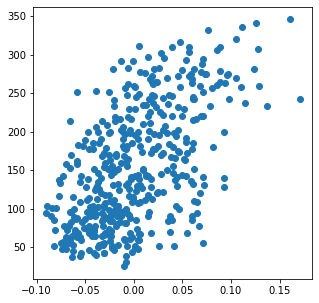

In [2]:
# Load the diabetes dataset
x, y = datasets.load_diabetes(return_X_y=True)

# Use only one feature
x = x[:, 2]

# Plot the data
plt.scatter(x, y)
plt.show()

#### Q1. (2 pts.)

Implment SGD with a learning rate $\epsilon_k$ that randomly samples (w/o replacement) a minibatch of size $m$ from the dataset at each iteration.

Adjust the learning rate at each iteration $k$ so that it decays linearly until iteration $\tau$:

\begin{align}
    \epsilon_k &= (1-\alpha)\epsilon_0 + \alpha \epsilon_\tau
\end{align}

where $\alpha = \frac{k}{\tau}$. After iteration $\tau$, leave $\epsilon$ constant.

Similar to the previous exam, use SGD to estimate the parameters $\hat{\theta}_0$ and $\hat{\theta}_1$ by minimizing the <b><i>mean squared error</b></i> (MSE):

\begin{align*}
    J(\hat{\theta}_0, \hat{\theta}_1) &= \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2
\end{align*}

Print a diagnostic output for the first five iterations $k = 0, 1, 2, 3, 4$, then print the output every 100 iterations, i.e. $k = 100, 200, 300 , \ldots, 5000$.

The diagnostic output should contain the following: the iteration $k$, learning rate $\epsilon_k$, parameters $\hat{\theta}_{0,k}, \hat{\theta}_{1,k}$, and MSE $J(\hat{\theta}_{0,k}, \hat{\theta}_{1,k})$.

In [3]:
# Use the following variables
np.random.seed(1)
m = 100
tau = 4000
lr_0 = 0.5
lr_tau = 0.01
theta_k = np.array([1, 1])

# Your code here

c_ = np.c_[x,y]


# def G(theta_k, x, y):
#     batch_len = len(x)
#     y_minus_yhat_sq = [(y_i-(theta_k[0] + theta_k[1]*x_i))**2 for x_i,y_i in zip(x,y)]
#     return (1/batch_len)*(sum(y_minus_yhat_sq))
def G(theta_k, x, y):
    return np.mean((y - (theta_k[0] + theta_k[1]*x))**2)


def grad_theta_0(theta_k,x,y):
    
    return np.mean(-2*y + 2*theta_k[0] + 2*theta_k[1]*x)

def grad_theta_1(theta_k,x,y):
    
    return np.mean(-2*y*x + 2*theta_k[0]*x + 2*theta_k[1]*x**2)




theta_k = np.array([1, 1]) #intial guess



for k in range(0, 400000):
    alpha = k / tau
    e_k = (1-alpha)*lr_0 + alpha*lr_tau
    
    np.random.shuffle(c_)
    
    if k > tau:
        e_k = lr_tau
    
    for start in range(0,len(x),m):
        stop = start + m

        x_batch, y_batch = c_[start:stop, 0], c_[start:stop, -1]
        
        diff = e_k * np.array([grad_theta_0(theta_k, x_batch, y_batch), grad_theta_1(theta_k, x_batch, y_batch)])
        
        theta_k = theta_k - diff
    
    if k in [0,1,2,3,4]:
        print("k = %d --" %k,"-- theta_k[0] = %.4f --" %theta_k[0],"-- theta_k[1] = %.4f --" %theta_k[1], "-- G(theta_k) = %.4f" %G(theta_k,x,y))
    elif k % 100 == 0:
        print("k = %d --" %k,"e_k = %.4f --" %e_k,"-- theta_k[0] = %.4f --" %theta_k[0],"-- theta_k[1] = %.4f --" %theta_k[1], "-- G(theta_k) = %.4f" %G(theta_k,x,y))
    

k = 0 -- -- theta_k[0] = 156.7888 -- -- theta_k[1] = 10.9061 -- -- G(theta_k) = 5904.9720
k = 1 -- -- theta_k[0] = 141.8600 -- -- theta_k[1] = 21.7470 -- -- G(theta_k) = 5943.0725
k = 2 -- -- theta_k[0] = 168.8165 -- -- theta_k[1] = 32.1661 -- -- G(theta_k) = 6072.3621
k = 3 -- -- theta_k[0] = 148.6427 -- -- theta_k[1] = 42.2624 -- -- G(theta_k) = 5764.5484
k = 4 -- -- theta_k[0] = 147.1305 -- -- theta_k[1] = 52.4167 -- -- G(theta_k) = 5735.9441
k = 100 -- e_k = 0.4877 -- -- theta_k[0] = 146.0976 -- -- theta_k[1] = 641.1587 -- -- G(theta_k) = 4141.8982
k = 200 -- e_k = 0.4755 -- -- theta_k[0] = 141.3239 -- -- theta_k[1] = 847.9657 -- -- G(theta_k) = 4030.5984
k = 300 -- e_k = 0.4632 -- -- theta_k[0] = 149.6072 -- -- theta_k[1] = 916.9557 -- -- G(theta_k) = 3899.2256
k = 400 -- e_k = 0.4510 -- -- theta_k[0] = 144.7107 -- -- theta_k[1] = 939.0120 -- -- G(theta_k) = 3945.8001
k = 500 -- e_k = 0.4387 -- -- theta_k[0] = 147.4877 -- -- theta_k[1] = 946.8760 -- -- G(theta_k) = 3912.0550
k = 6

k = 7500 -- e_k = 0.0100 -- -- theta_k[0] = 152.1704 -- -- theta_k[1] = 949.8793 -- -- G(theta_k) = 3890.4584
k = 7600 -- e_k = 0.0100 -- -- theta_k[0] = 151.4614 -- -- theta_k[1] = 949.7667 -- -- G(theta_k) = 3890.9085
k = 7700 -- e_k = 0.0100 -- -- theta_k[0] = 151.9829 -- -- theta_k[1] = 949.8033 -- -- G(theta_k) = 3890.4796
k = 7800 -- e_k = 0.0100 -- -- theta_k[0] = 152.1111 -- -- theta_k[1] = 949.8059 -- -- G(theta_k) = 3890.4574
k = 7900 -- e_k = 0.0100 -- -- theta_k[0] = 151.9005 -- -- theta_k[1] = 949.6830 -- -- G(theta_k) = 3890.5110
k = 8000 -- e_k = 0.0100 -- -- theta_k[0] = 151.9681 -- -- theta_k[1] = 949.6113 -- -- G(theta_k) = 3890.4840
k = 8100 -- e_k = 0.0100 -- -- theta_k[0] = 151.8131 -- -- theta_k[1] = 949.6700 -- -- G(theta_k) = 3890.5593
k = 8200 -- e_k = 0.0100 -- -- theta_k[0] = 152.6229 -- -- theta_k[1] = 949.6687 -- -- G(theta_k) = 3890.6963
k = 8300 -- e_k = 0.0100 -- -- theta_k[0] = 152.4013 -- -- theta_k[1] = 949.7076 -- -- G(theta_k) = 3890.5285
k = 8400 -

k = 15300 -- e_k = 0.0100 -- -- theta_k[0] = 152.4029 -- -- theta_k[1] = 949.6725 -- -- G(theta_k) = 3890.5293
k = 15400 -- e_k = 0.0100 -- -- theta_k[0] = 151.9663 -- -- theta_k[1] = 949.7480 -- -- G(theta_k) = 3890.4847
k = 15500 -- e_k = 0.0100 -- -- theta_k[0] = 152.2296 -- -- theta_k[1] = 949.7654 -- -- G(theta_k) = 3890.4661
k = 15600 -- e_k = 0.0100 -- -- theta_k[0] = 152.3306 -- -- theta_k[1] = 949.8564 -- -- G(theta_k) = 3890.4959
k = 15700 -- e_k = 0.0100 -- -- theta_k[0] = 151.7738 -- -- theta_k[1] = 949.8657 -- -- G(theta_k) = 3890.5864
k = 15800 -- e_k = 0.0100 -- -- theta_k[0] = 152.0081 -- -- theta_k[1] = 949.8764 -- -- G(theta_k) = 3890.4727
k = 15900 -- e_k = 0.0100 -- -- theta_k[0] = 152.1716 -- -- theta_k[1] = 949.8993 -- -- G(theta_k) = 3890.4585
k = 16000 -- e_k = 0.0100 -- -- theta_k[0] = 152.1955 -- -- theta_k[1] = 949.9008 -- -- G(theta_k) = 3890.4609
k = 16100 -- e_k = 0.0100 -- -- theta_k[0] = 152.1532 -- -- theta_k[1] = 949.8635 -- -- G(theta_k) = 3890.4574
k

k = 22800 -- e_k = 0.0100 -- -- theta_k[0] = 152.0895 -- -- theta_k[1] = 949.4467 -- -- G(theta_k) = 3890.4585
k = 22900 -- e_k = 0.0100 -- -- theta_k[0] = 152.2566 -- -- theta_k[1] = 949.4561 -- -- G(theta_k) = 3890.4717
k = 23000 -- e_k = 0.0100 -- -- theta_k[0] = 152.3312 -- -- theta_k[1] = 949.5392 -- -- G(theta_k) = 3890.4957
k = 23100 -- e_k = 0.0100 -- -- theta_k[0] = 152.2762 -- -- theta_k[1] = 949.5241 -- -- G(theta_k) = 3890.4770
k = 23200 -- e_k = 0.0100 -- -- theta_k[0] = 152.0670 -- -- theta_k[1] = 949.5421 -- -- G(theta_k) = 3890.4610
k = 23300 -- e_k = 0.0100 -- -- theta_k[0] = 151.9435 -- -- theta_k[1] = 949.4841 -- -- G(theta_k) = 3890.4927
k = 23400 -- e_k = 0.0100 -- -- theta_k[0] = 151.6762 -- -- theta_k[1] = 949.4793 -- -- G(theta_k) = 3890.6657
k = 23500 -- e_k = 0.0100 -- -- theta_k[0] = 152.5741 -- -- theta_k[1] = 949.4981 -- -- G(theta_k) = 3890.6508
k = 23600 -- e_k = 0.0100 -- -- theta_k[0] = 151.8434 -- -- theta_k[1] = 949.5073 -- -- G(theta_k) = 3890.5407
k

k = 30400 -- e_k = 0.0100 -- -- theta_k[0] = 152.2604 -- -- theta_k[1] = 948.9271 -- -- G(theta_k) = 3890.4733
k = 30500 -- e_k = 0.0100 -- -- theta_k[0] = 152.1858 -- -- theta_k[1] = 948.9456 -- -- G(theta_k) = 3890.4599
k = 30600 -- e_k = 0.0100 -- -- theta_k[0] = 151.5354 -- -- theta_k[1] = 948.9034 -- -- G(theta_k) = 3890.8149
k = 30700 -- e_k = 0.0100 -- -- theta_k[0] = 152.1672 -- -- theta_k[1] = 948.9164 -- -- G(theta_k) = 3890.4583
k = 30800 -- e_k = 0.0100 -- -- theta_k[0] = 152.0089 -- -- theta_k[1] = 948.9554 -- -- G(theta_k) = 3890.4726
k = 30900 -- e_k = 0.0100 -- -- theta_k[0] = 152.2241 -- -- theta_k[1] = 948.9597 -- -- G(theta_k) = 3890.4653
k = 31000 -- e_k = 0.0100 -- -- theta_k[0] = 152.2357 -- -- theta_k[1] = 948.9783 -- -- G(theta_k) = 3890.4675
k = 31100 -- e_k = 0.0100 -- -- theta_k[0] = 152.1105 -- -- theta_k[1] = 949.0178 -- -- G(theta_k) = 3890.4575
k = 31200 -- e_k = 0.0100 -- -- theta_k[0] = 151.8767 -- -- theta_k[1] = 949.0551 -- -- G(theta_k) = 3890.5228
k

k = 37800 -- e_k = 0.0100 -- -- theta_k[0] = 152.0051 -- -- theta_k[1] = 949.4898 -- -- G(theta_k) = 3890.4731
k = 37900 -- e_k = 0.0100 -- -- theta_k[0] = 152.1823 -- -- theta_k[1] = 949.5235 -- -- G(theta_k) = 3890.4590
k = 38000 -- e_k = 0.0100 -- -- theta_k[0] = 152.7173 -- -- theta_k[1] = 949.5396 -- -- G(theta_k) = 3890.7974
k = 38100 -- e_k = 0.0100 -- -- theta_k[0] = 151.7777 -- -- theta_k[1] = 949.5106 -- -- G(theta_k) = 3890.5832
k = 38200 -- e_k = 0.0100 -- -- theta_k[0] = 152.4388 -- -- theta_k[1] = 949.4920 -- -- G(theta_k) = 3890.5498
k = 38300 -- e_k = 0.0100 -- -- theta_k[0] = 152.3715 -- -- theta_k[1] = 949.4608 -- -- G(theta_k) = 3890.5132
k = 38400 -- e_k = 0.0100 -- -- theta_k[0] = 152.0447 -- -- theta_k[1] = 949.4148 -- -- G(theta_k) = 3890.4645
k = 38500 -- e_k = 0.0100 -- -- theta_k[0] = 152.6512 -- -- theta_k[1] = 949.3767 -- -- G(theta_k) = 3890.7246
k = 38600 -- e_k = 0.0100 -- -- theta_k[0] = 152.5216 -- -- theta_k[1] = 949.3828 -- -- G(theta_k) = 3890.6072
k

k = 45400 -- e_k = 0.0100 -- -- theta_k[0] = 152.0769 -- -- theta_k[1] = 949.5588 -- -- G(theta_k) = 3890.4598
k = 45500 -- e_k = 0.0100 -- -- theta_k[0] = 152.2272 -- -- theta_k[1] = 949.4585 -- -- G(theta_k) = 3890.4654
k = 45600 -- e_k = 0.0100 -- -- theta_k[0] = 151.9660 -- -- theta_k[1] = 949.4467 -- -- G(theta_k) = 3890.4846
k = 45700 -- e_k = 0.0100 -- -- theta_k[0] = 152.3798 -- -- theta_k[1] = 949.4260 -- -- G(theta_k) = 3890.5173
k = 45800 -- e_k = 0.0100 -- -- theta_k[0] = 152.4877 -- -- theta_k[1] = 949.4870 -- -- G(theta_k) = 3890.5820
k = 45900 -- e_k = 0.0100 -- -- theta_k[0] = 152.4220 -- -- theta_k[1] = 949.4371 -- -- G(theta_k) = 3890.5398
k = 46000 -- e_k = 0.0100 -- -- theta_k[0] = 151.7577 -- -- theta_k[1] = 949.4448 -- -- G(theta_k) = 3890.5978
k = 46100 -- e_k = 0.0100 -- -- theta_k[0] = 152.0182 -- -- theta_k[1] = 949.3889 -- -- G(theta_k) = 3890.4699
k = 46200 -- e_k = 0.0100 -- -- theta_k[0] = 152.1814 -- -- theta_k[1] = 949.3196 -- -- G(theta_k) = 3890.4589
k

k = 52900 -- e_k = 0.0100 -- -- theta_k[0] = 151.7657 -- -- theta_k[1] = 949.1870 -- -- G(theta_k) = 3890.5920
k = 53000 -- e_k = 0.0100 -- -- theta_k[0] = 151.6262 -- -- theta_k[1] = 949.2308 -- -- G(theta_k) = 3890.7140
k = 53100 -- e_k = 0.0100 -- -- theta_k[0] = 152.3842 -- -- theta_k[1] = 949.2460 -- -- G(theta_k) = 3890.5195
k = 53200 -- e_k = 0.0100 -- -- theta_k[0] = 152.0631 -- -- theta_k[1] = 949.2312 -- -- G(theta_k) = 3890.4616
k = 53300 -- e_k = 0.0100 -- -- theta_k[0] = 151.8956 -- -- theta_k[1] = 949.1764 -- -- G(theta_k) = 3890.5133
k = 53400 -- e_k = 0.0100 -- -- theta_k[0] = 151.9265 -- -- theta_k[1] = 949.1551 -- -- G(theta_k) = 3890.4996
k = 53500 -- e_k = 0.0100 -- -- theta_k[0] = 151.5247 -- -- theta_k[1] = 949.2826 -- -- G(theta_k) = 3890.8273
k = 53600 -- e_k = 0.0100 -- -- theta_k[0] = 152.2906 -- -- theta_k[1] = 949.3368 -- -- G(theta_k) = 3890.4813
k = 53700 -- e_k = 0.0100 -- -- theta_k[0] = 152.0347 -- -- theta_k[1] = 949.2408 -- -- G(theta_k) = 3890.4664
k

k = 60300 -- e_k = 0.0100 -- -- theta_k[0] = 152.2924 -- -- theta_k[1] = 949.2511 -- -- G(theta_k) = 3890.4819
k = 60400 -- e_k = 0.0100 -- -- theta_k[0] = 151.8585 -- -- theta_k[1] = 949.2453 -- -- G(theta_k) = 3890.5323
k = 60500 -- e_k = 0.0100 -- -- theta_k[0] = 152.2616 -- -- theta_k[1] = 949.3024 -- -- G(theta_k) = 3890.4730
k = 60600 -- e_k = 0.0100 -- -- theta_k[0] = 152.0039 -- -- theta_k[1] = 949.2765 -- -- G(theta_k) = 3890.4734
k = 60700 -- e_k = 0.0100 -- -- theta_k[0] = 152.0824 -- -- theta_k[1] = 949.2480 -- -- G(theta_k) = 3890.4593
k = 60800 -- e_k = 0.0100 -- -- theta_k[0] = 151.9758 -- -- theta_k[1] = 949.2338 -- -- G(theta_k) = 3890.4815
k = 60900 -- e_k = 0.0100 -- -- theta_k[0] = 152.1254 -- -- theta_k[1] = 949.2659 -- -- G(theta_k) = 3890.4567
k = 61000 -- e_k = 0.0100 -- -- theta_k[0] = 151.8269 -- -- theta_k[1] = 949.3305 -- -- G(theta_k) = 3890.5506
k = 61100 -- e_k = 0.0100 -- -- theta_k[0] = 152.2643 -- -- theta_k[1] = 949.3294 -- -- G(theta_k) = 3890.4737
k

k = 67800 -- e_k = 0.0100 -- -- theta_k[0] = 152.0048 -- -- theta_k[1] = 949.2245 -- -- G(theta_k) = 3890.4732
k = 67900 -- e_k = 0.0100 -- -- theta_k[0] = 152.4723 -- -- theta_k[1] = 949.2447 -- -- G(theta_k) = 3890.5715
k = 68000 -- e_k = 0.0100 -- -- theta_k[0] = 152.0935 -- -- theta_k[1] = 949.2061 -- -- G(theta_k) = 3890.4583
k = 68100 -- e_k = 0.0100 -- -- theta_k[0] = 152.0890 -- -- theta_k[1] = 949.2432 -- -- G(theta_k) = 3890.4586
k = 68200 -- e_k = 0.0100 -- -- theta_k[0] = 152.3210 -- -- theta_k[1] = 949.3479 -- -- G(theta_k) = 3890.4917
k = 68300 -- e_k = 0.0100 -- -- theta_k[0] = 152.0588 -- -- theta_k[1] = 949.3663 -- -- G(theta_k) = 3890.4622
k = 68400 -- e_k = 0.0100 -- -- theta_k[0] = 152.4808 -- -- theta_k[1] = 949.4189 -- -- G(theta_k) = 3890.5772
k = 68500 -- e_k = 0.0100 -- -- theta_k[0] = 151.8982 -- -- theta_k[1] = 949.4126 -- -- G(theta_k) = 3890.5120
k = 68600 -- e_k = 0.0100 -- -- theta_k[0] = 152.0193 -- -- theta_k[1] = 949.4236 -- -- G(theta_k) = 3890.4696
k

k = 75200 -- e_k = 0.0100 -- -- theta_k[0] = 151.9505 -- -- theta_k[1] = 949.7112 -- -- G(theta_k) = 3890.4903
k = 75300 -- e_k = 0.0100 -- -- theta_k[0] = 151.6748 -- -- theta_k[1] = 949.6680 -- -- G(theta_k) = 3890.6671
k = 75400 -- e_k = 0.0100 -- -- theta_k[0] = 151.9883 -- -- theta_k[1] = 949.6096 -- -- G(theta_k) = 3890.4777
k = 75500 -- e_k = 0.0100 -- -- theta_k[0] = 152.4554 -- -- theta_k[1] = 949.5857 -- -- G(theta_k) = 3890.5602
k = 75600 -- e_k = 0.0100 -- -- theta_k[0] = 152.3151 -- -- theta_k[1] = 949.6592 -- -- G(theta_k) = 3890.4897
k = 75700 -- e_k = 0.0100 -- -- theta_k[0] = 152.4059 -- -- theta_k[1] = 949.6490 -- -- G(theta_k) = 3890.5309
k = 75800 -- e_k = 0.0100 -- -- theta_k[0] = 152.3452 -- -- theta_k[1] = 949.6964 -- -- G(theta_k) = 3890.5016
k = 75900 -- e_k = 0.0100 -- -- theta_k[0] = 152.0356 -- -- theta_k[1] = 949.6584 -- -- G(theta_k) = 3890.4663
k = 76000 -- e_k = 0.0100 -- -- theta_k[0] = 152.1743 -- -- theta_k[1] = 949.6523 -- -- G(theta_k) = 3890.4584
k

k = 82600 -- e_k = 0.0100 -- -- theta_k[0] = 152.5457 -- -- theta_k[1] = 949.6148 -- -- G(theta_k) = 3890.6266
k = 82700 -- e_k = 0.0100 -- -- theta_k[0] = 151.9998 -- -- theta_k[1] = 949.6215 -- -- G(theta_k) = 3890.4745
k = 82800 -- e_k = 0.0100 -- -- theta_k[0] = 152.2625 -- -- theta_k[1] = 949.7081 -- -- G(theta_k) = 3890.4734
k = 82900 -- e_k = 0.0100 -- -- theta_k[0] = 152.0442 -- -- theta_k[1] = 949.5968 -- -- G(theta_k) = 3890.4646
k = 83000 -- e_k = 0.0100 -- -- theta_k[0] = 151.9916 -- -- theta_k[1] = 949.5591 -- -- G(theta_k) = 3890.4768
k = 83100 -- e_k = 0.0100 -- -- theta_k[0] = 152.2813 -- -- theta_k[1] = 949.5780 -- -- G(theta_k) = 3890.4785
k = 83200 -- e_k = 0.0100 -- -- theta_k[0] = 152.1249 -- -- theta_k[1] = 949.6038 -- -- G(theta_k) = 3890.4567
k = 83300 -- e_k = 0.0100 -- -- theta_k[0] = 152.2096 -- -- theta_k[1] = 949.6408 -- -- G(theta_k) = 3890.4625
k = 83400 -- e_k = 0.0100 -- -- theta_k[0] = 151.8644 -- -- theta_k[1] = 949.5291 -- -- G(theta_k) = 3890.5290
k

k = 90200 -- e_k = 0.0100 -- -- theta_k[0] = 152.4182 -- -- theta_k[1] = 949.4301 -- -- G(theta_k) = 3890.5376
k = 90300 -- e_k = 0.0100 -- -- theta_k[0] = 151.6610 -- -- theta_k[1] = 949.5296 -- -- G(theta_k) = 3890.6798
k = 90400 -- e_k = 0.0100 -- -- theta_k[0] = 152.0862 -- -- theta_k[1] = 949.4643 -- -- G(theta_k) = 3890.4588
k = 90500 -- e_k = 0.0100 -- -- theta_k[0] = 152.2540 -- -- theta_k[1] = 949.4531 -- -- G(theta_k) = 3890.4711
k = 90600 -- e_k = 0.0100 -- -- theta_k[0] = 152.6566 -- -- theta_k[1] = 949.5258 -- -- G(theta_k) = 3890.7302
k = 90700 -- e_k = 0.0100 -- -- theta_k[0] = 152.0082 -- -- theta_k[1] = 949.4945 -- -- G(theta_k) = 3890.4723
k = 90800 -- e_k = 0.0100 -- -- theta_k[0] = 151.9904 -- -- theta_k[1] = 949.4161 -- -- G(theta_k) = 3890.4771
k = 90900 -- e_k = 0.0100 -- -- theta_k[0] = 151.5474 -- -- theta_k[1] = 949.4610 -- -- G(theta_k) = 3890.8000
k = 91000 -- e_k = 0.0100 -- -- theta_k[0] = 152.2857 -- -- theta_k[1] = 949.4928 -- -- G(theta_k) = 3890.4798
k

k = 97800 -- e_k = 0.0100 -- -- theta_k[0] = 151.5166 -- -- theta_k[1] = 949.7148 -- -- G(theta_k) = 3890.8374
k = 97900 -- e_k = 0.0100 -- -- theta_k[0] = 151.9265 -- -- theta_k[1] = 949.7339 -- -- G(theta_k) = 3890.4996
k = 98000 -- e_k = 0.0100 -- -- theta_k[0] = 152.3840 -- -- theta_k[1] = 949.7324 -- -- G(theta_k) = 3890.5196
k = 98100 -- e_k = 0.0100 -- -- theta_k[0] = 151.9936 -- -- theta_k[1] = 949.7554 -- -- G(theta_k) = 3890.4764
k = 98200 -- e_k = 0.0100 -- -- theta_k[0] = 152.0443 -- -- theta_k[1] = 949.8433 -- -- G(theta_k) = 3890.4649
k = 98300 -- e_k = 0.0100 -- -- theta_k[0] = 152.4921 -- -- theta_k[1] = 949.8947 -- -- G(theta_k) = 3890.5857
k = 98400 -- e_k = 0.0100 -- -- theta_k[0] = 152.5796 -- -- theta_k[1] = 949.9247 -- -- G(theta_k) = 3890.6562
k = 98500 -- e_k = 0.0100 -- -- theta_k[0] = 151.9691 -- -- theta_k[1] = 949.9788 -- -- G(theta_k) = 3890.4843
k = 98600 -- e_k = 0.0100 -- -- theta_k[0] = 152.1424 -- -- theta_k[1] = 949.9180 -- -- G(theta_k) = 3890.4572
k

k = 105300 -- e_k = 0.0100 -- -- theta_k[0] = 151.6435 -- -- theta_k[1] = 950.0141 -- -- G(theta_k) = 3890.6974
k = 105400 -- e_k = 0.0100 -- -- theta_k[0] = 151.8746 -- -- theta_k[1] = 950.0923 -- -- G(theta_k) = 3890.5246
k = 105500 -- e_k = 0.0100 -- -- theta_k[0] = 152.0781 -- -- theta_k[1] = 950.1153 -- -- G(theta_k) = 3890.4607
k = 105600 -- e_k = 0.0100 -- -- theta_k[0] = 152.4781 -- -- theta_k[1] = 949.9718 -- -- G(theta_k) = 3890.5760
k = 105700 -- e_k = 0.0100 -- -- theta_k[0] = 152.0197 -- -- theta_k[1] = 950.0298 -- -- G(theta_k) = 3890.4703
k = 105800 -- e_k = 0.0100 -- -- theta_k[0] = 152.3311 -- -- theta_k[1] = 950.0088 -- -- G(theta_k) = 3890.4964
k = 105900 -- e_k = 0.0100 -- -- theta_k[0] = 151.8172 -- -- theta_k[1] = 950.0460 -- -- G(theta_k) = 3890.5575
k = 106000 -- e_k = 0.0100 -- -- theta_k[0] = 152.0189 -- -- theta_k[1] = 950.0298 -- -- G(theta_k) = 3890.4705
k = 106100 -- e_k = 0.0100 -- -- theta_k[0] = 152.0350 -- -- theta_k[1] = 950.0459 -- -- G(theta_k) = 38

k = 112900 -- e_k = 0.0100 -- -- theta_k[0] = 152.0017 -- -- theta_k[1] = 949.6150 -- -- G(theta_k) = 3890.4740
k = 113000 -- e_k = 0.0100 -- -- theta_k[0] = 151.8876 -- -- theta_k[1] = 949.7189 -- -- G(theta_k) = 3890.5172
k = 113100 -- e_k = 0.0100 -- -- theta_k[0] = 152.1229 -- -- theta_k[1] = 949.6999 -- -- G(theta_k) = 3890.4569
k = 113200 -- e_k = 0.0100 -- -- theta_k[0] = 152.0331 -- -- theta_k[1] = 949.6445 -- -- G(theta_k) = 3890.4668
k = 113300 -- e_k = 0.0100 -- -- theta_k[0] = 152.3530 -- -- theta_k[1] = 949.6800 -- -- G(theta_k) = 3890.5049
k = 113400 -- e_k = 0.0100 -- -- theta_k[0] = 152.9701 -- -- theta_k[1] = 949.6841 -- -- G(theta_k) = 3891.1567
k = 113500 -- e_k = 0.0100 -- -- theta_k[0] = 152.0991 -- -- theta_k[1] = 949.7291 -- -- G(theta_k) = 3890.4580
k = 113600 -- e_k = 0.0100 -- -- theta_k[0] = 152.1579 -- -- theta_k[1] = 949.6883 -- -- G(theta_k) = 3890.4573
k = 113700 -- e_k = 0.0100 -- -- theta_k[0] = 151.9789 -- -- theta_k[1] = 949.7007 -- -- G(theta_k) = 38

k = 120300 -- e_k = 0.0100 -- -- theta_k[0] = 151.9964 -- -- theta_k[1] = 949.7326 -- -- G(theta_k) = 3890.4756
k = 120400 -- e_k = 0.0100 -- -- theta_k[0] = 151.8531 -- -- theta_k[1] = 949.7129 -- -- G(theta_k) = 3890.5354
k = 120500 -- e_k = 0.0100 -- -- theta_k[0] = 152.0899 -- -- theta_k[1] = 949.7226 -- -- G(theta_k) = 3890.4587
k = 120600 -- e_k = 0.0100 -- -- theta_k[0] = 151.9461 -- -- theta_k[1] = 949.7113 -- -- G(theta_k) = 3890.4919
k = 120700 -- e_k = 0.0100 -- -- theta_k[0] = 151.8457 -- -- theta_k[1] = 949.6916 -- -- G(theta_k) = 3890.5395
k = 120800 -- e_k = 0.0100 -- -- theta_k[0] = 152.2015 -- -- theta_k[1] = 949.6613 -- -- G(theta_k) = 3890.4613
k = 120900 -- e_k = 0.0100 -- -- theta_k[0] = 152.1345 -- -- theta_k[1] = 949.6801 -- -- G(theta_k) = 3890.4567
k = 121000 -- e_k = 0.0100 -- -- theta_k[0] = 151.5848 -- -- theta_k[1] = 949.6099 -- -- G(theta_k) = 3890.7577
k = 121100 -- e_k = 0.0100 -- -- theta_k[0] = 151.9979 -- -- theta_k[1] = 949.6135 -- -- G(theta_k) = 38

k = 128000 -- e_k = 0.0100 -- -- theta_k[0] = 152.0353 -- -- theta_k[1] = 949.7282 -- -- G(theta_k) = 3890.4664
k = 128100 -- e_k = 0.0100 -- -- theta_k[0] = 152.2280 -- -- theta_k[1] = 949.7881 -- -- G(theta_k) = 3890.4658
k = 128200 -- e_k = 0.0100 -- -- theta_k[0] = 151.9527 -- -- theta_k[1] = 949.7742 -- -- G(theta_k) = 3890.4895
k = 128300 -- e_k = 0.0100 -- -- theta_k[0] = 152.6914 -- -- theta_k[1] = 949.7749 -- -- G(theta_k) = 3890.7681
k = 128400 -- e_k = 0.0100 -- -- theta_k[0] = 152.4899 -- -- theta_k[1] = 949.7324 -- -- G(theta_k) = 3890.5838
k = 128500 -- e_k = 0.0100 -- -- theta_k[0] = 152.1310 -- -- theta_k[1] = 949.7167 -- -- G(theta_k) = 3890.4568
k = 128600 -- e_k = 0.0100 -- -- theta_k[0] = 152.0413 -- -- theta_k[1] = 949.7934 -- -- G(theta_k) = 3890.4654
k = 128700 -- e_k = 0.0100 -- -- theta_k[0] = 151.8660 -- -- theta_k[1] = 949.8755 -- -- G(theta_k) = 3890.5286
k = 128800 -- e_k = 0.0100 -- -- theta_k[0] = 152.0667 -- -- theta_k[1] = 949.9354 -- -- G(theta_k) = 38

k = 135700 -- e_k = 0.0100 -- -- theta_k[0] = 152.1215 -- -- theta_k[1] = 949.9537 -- -- G(theta_k) = 3890.4573
k = 135800 -- e_k = 0.0100 -- -- theta_k[0] = 152.2168 -- -- theta_k[1] = 949.9179 -- -- G(theta_k) = 3890.4640
k = 135900 -- e_k = 0.0100 -- -- theta_k[0] = 152.2020 -- -- theta_k[1] = 949.9443 -- -- G(theta_k) = 3890.4619
k = 136000 -- e_k = 0.0100 -- -- theta_k[0] = 152.3305 -- -- theta_k[1] = 949.8908 -- -- G(theta_k) = 3890.4959
k = 136100 -- e_k = 0.0100 -- -- theta_k[0] = 152.1004 -- -- theta_k[1] = 949.9579 -- -- G(theta_k) = 3890.4583
k = 136200 -- e_k = 0.0100 -- -- theta_k[0] = 151.9703 -- -- theta_k[1] = 949.9912 -- -- G(theta_k) = 3890.4839
k = 136300 -- e_k = 0.0100 -- -- theta_k[0] = 151.9005 -- -- theta_k[1] = 949.9792 -- -- G(theta_k) = 3890.5115
k = 136400 -- e_k = 0.0100 -- -- theta_k[0] = 151.7497 -- -- theta_k[1] = 949.9305 -- -- G(theta_k) = 3890.6045
k = 136500 -- e_k = 0.0100 -- -- theta_k[0] = 151.9509 -- -- theta_k[1] = 949.9390 -- -- G(theta_k) = 38

k = 143300 -- e_k = 0.0100 -- -- theta_k[0] = 152.4800 -- -- theta_k[1] = 949.1999 -- -- G(theta_k) = 3890.5768
k = 143400 -- e_k = 0.0100 -- -- theta_k[0] = 151.8926 -- -- theta_k[1] = 949.2271 -- -- G(theta_k) = 3890.5147
k = 143500 -- e_k = 0.0100 -- -- theta_k[0] = 152.4785 -- -- theta_k[1] = 949.1990 -- -- G(theta_k) = 3890.5758
k = 143600 -- e_k = 0.0100 -- -- theta_k[0] = 151.8127 -- -- theta_k[1] = 949.1025 -- -- G(theta_k) = 3890.5597
k = 143700 -- e_k = 0.0100 -- -- theta_k[0] = 152.0986 -- -- theta_k[1] = 949.1709 -- -- G(theta_k) = 3890.4580
k = 143800 -- e_k = 0.0100 -- -- theta_k[0] = 152.1219 -- -- theta_k[1] = 949.2317 -- -- G(theta_k) = 3890.4568
k = 143900 -- e_k = 0.0100 -- -- theta_k[0] = 151.9362 -- -- theta_k[1] = 949.2212 -- -- G(theta_k) = 3890.4956
k = 144000 -- e_k = 0.0100 -- -- theta_k[0] = 152.1325 -- -- theta_k[1] = 949.2790 -- -- G(theta_k) = 3890.4566
k = 144100 -- e_k = 0.0100 -- -- theta_k[0] = 152.2015 -- -- theta_k[1] = 949.2760 -- -- G(theta_k) = 38

k = 150900 -- e_k = 0.0100 -- -- theta_k[0] = 151.9565 -- -- theta_k[1] = 949.1605 -- -- G(theta_k) = 3890.4881
k = 151000 -- e_k = 0.0100 -- -- theta_k[0] = 152.3232 -- -- theta_k[1] = 949.1587 -- -- G(theta_k) = 3890.4928
k = 151100 -- e_k = 0.0100 -- -- theta_k[0] = 152.1148 -- -- theta_k[1] = 949.2083 -- -- G(theta_k) = 3890.4570
k = 151200 -- e_k = 0.0100 -- -- theta_k[0] = 152.3823 -- -- theta_k[1] = 949.2547 -- -- G(theta_k) = 3890.5186
k = 151300 -- e_k = 0.0100 -- -- theta_k[0] = 151.8595 -- -- theta_k[1] = 949.2775 -- -- G(theta_k) = 3890.5317
k = 151400 -- e_k = 0.0100 -- -- theta_k[0] = 151.5234 -- -- theta_k[1] = 949.2883 -- -- G(theta_k) = 3890.8289
k = 151500 -- e_k = 0.0100 -- -- theta_k[0] = 152.2389 -- -- theta_k[1] = 949.2335 -- -- G(theta_k) = 3890.4678
k = 151600 -- e_k = 0.0100 -- -- theta_k[0] = 152.1133 -- -- theta_k[1] = 949.1724 -- -- G(theta_k) = 3890.4571
k = 151700 -- e_k = 0.0100 -- -- theta_k[0] = 152.5499 -- -- theta_k[1] = 949.1918 -- -- G(theta_k) = 38

k = 158400 -- e_k = 0.0100 -- -- theta_k[0] = 152.0049 -- -- theta_k[1] = 949.3048 -- -- G(theta_k) = 3890.4732
k = 158500 -- e_k = 0.0100 -- -- theta_k[0] = 152.3307 -- -- theta_k[1] = 949.2254 -- -- G(theta_k) = 3890.4956
k = 158600 -- e_k = 0.0100 -- -- theta_k[0] = 152.3261 -- -- theta_k[1] = 949.2405 -- -- G(theta_k) = 3890.4938
k = 158700 -- e_k = 0.0100 -- -- theta_k[0] = 152.1189 -- -- theta_k[1] = 949.1904 -- -- G(theta_k) = 3890.4569
k = 158800 -- e_k = 0.0100 -- -- theta_k[0] = 152.2597 -- -- theta_k[1] = 949.2258 -- -- G(theta_k) = 3890.4726
k = 158900 -- e_k = 0.0100 -- -- theta_k[0] = 151.7628 -- -- theta_k[1] = 949.2379 -- -- G(theta_k) = 3890.5941
k = 159000 -- e_k = 0.0100 -- -- theta_k[0] = 152.1190 -- -- theta_k[1] = 949.2396 -- -- G(theta_k) = 3890.4569
k = 159100 -- e_k = 0.0100 -- -- theta_k[0] = 152.3584 -- -- theta_k[1] = 949.2811 -- -- G(theta_k) = 3890.5072
k = 159200 -- e_k = 0.0100 -- -- theta_k[0] = 152.2146 -- -- theta_k[1] = 949.3103 -- -- G(theta_k) = 38

k = 165900 -- e_k = 0.0100 -- -- theta_k[0] = 152.3615 -- -- theta_k[1] = 949.3419 -- -- G(theta_k) = 3890.5086
k = 166000 -- e_k = 0.0100 -- -- theta_k[0] = 151.9759 -- -- theta_k[1] = 949.3475 -- -- G(theta_k) = 3890.4814
k = 166100 -- e_k = 0.0100 -- -- theta_k[0] = 151.7200 -- -- theta_k[1] = 949.2711 -- -- G(theta_k) = 3890.6276
k = 166200 -- e_k = 0.0100 -- -- theta_k[0] = 152.3014 -- -- theta_k[1] = 949.2586 -- -- G(theta_k) = 3890.4849
k = 166300 -- e_k = 0.0100 -- -- theta_k[0] = 152.4844 -- -- theta_k[1] = 949.2431 -- -- G(theta_k) = 3890.5798
k = 166400 -- e_k = 0.0100 -- -- theta_k[0] = 151.9686 -- -- theta_k[1] = 949.2166 -- -- G(theta_k) = 3890.4839
k = 166500 -- e_k = 0.0100 -- -- theta_k[0] = 152.1383 -- -- theta_k[1] = 949.2044 -- -- G(theta_k) = 3890.4567
k = 166600 -- e_k = 0.0100 -- -- theta_k[0] = 151.8417 -- -- theta_k[1] = 949.1561 -- -- G(theta_k) = 3890.5419
k = 166700 -- e_k = 0.0100 -- -- theta_k[0] = 152.3711 -- -- theta_k[1] = 949.1187 -- -- G(theta_k) = 38

k = 173400 -- e_k = 0.0100 -- -- theta_k[0] = 151.9152 -- -- theta_k[1] = 949.3604 -- -- G(theta_k) = 3890.5042
k = 173500 -- e_k = 0.0100 -- -- theta_k[0] = 151.8943 -- -- theta_k[1] = 949.3684 -- -- G(theta_k) = 3890.5138
k = 173600 -- e_k = 0.0100 -- -- theta_k[0] = 152.3857 -- -- theta_k[1] = 949.3772 -- -- G(theta_k) = 3890.5202
k = 173700 -- e_k = 0.0100 -- -- theta_k[0] = 152.1193 -- -- theta_k[1] = 949.4093 -- -- G(theta_k) = 3890.4568
k = 173800 -- e_k = 0.0100 -- -- theta_k[0] = 151.8876 -- -- theta_k[1] = 949.3908 -- -- G(theta_k) = 3890.5170
k = 173900 -- e_k = 0.0100 -- -- theta_k[0] = 152.0528 -- -- theta_k[1] = 949.4555 -- -- G(theta_k) = 3890.4631
k = 174000 -- e_k = 0.0100 -- -- theta_k[0] = 152.2289 -- -- theta_k[1] = 949.3652 -- -- G(theta_k) = 3890.4657
k = 174100 -- e_k = 0.0100 -- -- theta_k[0] = 152.3432 -- -- theta_k[1] = 949.3462 -- -- G(theta_k) = 3890.5006
k = 174200 -- e_k = 0.0100 -- -- theta_k[0] = 152.0908 -- -- theta_k[1] = 949.3720 -- -- G(theta_k) = 38

k = 180900 -- e_k = 0.0100 -- -- theta_k[0] = 151.9727 -- -- theta_k[1] = 949.3637 -- -- G(theta_k) = 3890.4824
k = 181000 -- e_k = 0.0100 -- -- theta_k[0] = 152.6901 -- -- theta_k[1] = 949.3380 -- -- G(theta_k) = 3890.7664
k = 181100 -- e_k = 0.0100 -- -- theta_k[0] = 151.7940 -- -- theta_k[1] = 949.3002 -- -- G(theta_k) = 3890.5719
k = 181200 -- e_k = 0.0100 -- -- theta_k[0] = 152.2356 -- -- theta_k[1] = 949.3407 -- -- G(theta_k) = 3890.4670
k = 181300 -- e_k = 0.0100 -- -- theta_k[0] = 152.3732 -- -- theta_k[1] = 949.3768 -- -- G(theta_k) = 3890.5141
k = 181400 -- e_k = 0.0100 -- -- theta_k[0] = 152.3329 -- -- theta_k[1] = 949.3480 -- -- G(theta_k) = 3890.4964
k = 181500 -- e_k = 0.0100 -- -- theta_k[0] = 151.7015 -- -- theta_k[1] = 949.3852 -- -- G(theta_k) = 3890.6432
k = 181600 -- e_k = 0.0100 -- -- theta_k[0] = 151.9770 -- -- theta_k[1] = 949.3138 -- -- G(theta_k) = 3890.4811
k = 181700 -- e_k = 0.0100 -- -- theta_k[0] = 152.1522 -- -- theta_k[1] = 949.4028 -- -- G(theta_k) = 38

k = 188500 -- e_k = 0.0100 -- -- theta_k[0] = 151.8348 -- -- theta_k[1] = 949.7925 -- -- G(theta_k) = 3890.5461
k = 188600 -- e_k = 0.0100 -- -- theta_k[0] = 152.1144 -- -- theta_k[1] = 949.6956 -- -- G(theta_k) = 3890.4571
k = 188700 -- e_k = 0.0100 -- -- theta_k[0] = 152.3081 -- -- theta_k[1] = 949.7206 -- -- G(theta_k) = 3890.4872
k = 188800 -- e_k = 0.0100 -- -- theta_k[0] = 151.9669 -- -- theta_k[1] = 949.6247 -- -- G(theta_k) = 3890.4844
k = 188900 -- e_k = 0.0100 -- -- theta_k[0] = 152.3356 -- -- theta_k[1] = 949.5409 -- -- G(theta_k) = 3890.4975
k = 189000 -- e_k = 0.0100 -- -- theta_k[0] = 152.4928 -- -- theta_k[1] = 949.5421 -- -- G(theta_k) = 3890.5857
k = 189100 -- e_k = 0.0100 -- -- theta_k[0] = 152.1929 -- -- theta_k[1] = 949.5281 -- -- G(theta_k) = 3890.4601
k = 189200 -- e_k = 0.0100 -- -- theta_k[0] = 152.2388 -- -- theta_k[1] = 949.6181 -- -- G(theta_k) = 3890.4678
k = 189300 -- e_k = 0.0100 -- -- theta_k[0] = 152.2448 -- -- theta_k[1] = 949.6602 -- -- G(theta_k) = 38

k = 195900 -- e_k = 0.0100 -- -- theta_k[0] = 152.1885 -- -- theta_k[1] = 949.6115 -- -- G(theta_k) = 3890.4597
k = 196000 -- e_k = 0.0100 -- -- theta_k[0] = 152.0931 -- -- theta_k[1] = 949.6969 -- -- G(theta_k) = 3890.4584
k = 196100 -- e_k = 0.0100 -- -- theta_k[0] = 151.6702 -- -- theta_k[1] = 949.7322 -- -- G(theta_k) = 3890.6714
k = 196200 -- e_k = 0.0100 -- -- theta_k[0] = 151.9926 -- -- theta_k[1] = 949.7530 -- -- G(theta_k) = 3890.4767
k = 196300 -- e_k = 0.0100 -- -- theta_k[0] = 152.5728 -- -- theta_k[1] = 949.7336 -- -- G(theta_k) = 3890.6498
k = 196400 -- e_k = 0.0100 -- -- theta_k[0] = 151.6803 -- -- theta_k[1] = 949.6851 -- -- G(theta_k) = 3890.6621
k = 196500 -- e_k = 0.0100 -- -- theta_k[0] = 152.3301 -- -- theta_k[1] = 949.7699 -- -- G(theta_k) = 3890.4955
k = 196600 -- e_k = 0.0100 -- -- theta_k[0] = 151.5868 -- -- theta_k[1] = 949.7632 -- -- G(theta_k) = 3890.7556
k = 196700 -- e_k = 0.0100 -- -- theta_k[0] = 152.5333 -- -- theta_k[1] = 949.8245 -- -- G(theta_k) = 38

k = 203500 -- e_k = 0.0100 -- -- theta_k[0] = 152.1739 -- -- theta_k[1] = 949.3031 -- -- G(theta_k) = 3890.4583
k = 203600 -- e_k = 0.0100 -- -- theta_k[0] = 151.9704 -- -- theta_k[1] = 949.3038 -- -- G(theta_k) = 3890.4832
k = 203700 -- e_k = 0.0100 -- -- theta_k[0] = 152.1672 -- -- theta_k[1] = 949.3640 -- -- G(theta_k) = 3890.4577
k = 203800 -- e_k = 0.0100 -- -- theta_k[0] = 152.2296 -- -- theta_k[1] = 949.3843 -- -- G(theta_k) = 3890.4658
k = 203900 -- e_k = 0.0100 -- -- theta_k[0] = 152.3852 -- -- theta_k[1] = 949.4451 -- -- G(theta_k) = 3890.5200
k = 204000 -- e_k = 0.0100 -- -- theta_k[0] = 151.6760 -- -- theta_k[1] = 949.4785 -- -- G(theta_k) = 3890.6659
k = 204100 -- e_k = 0.0100 -- -- theta_k[0] = 151.8436 -- -- theta_k[1] = 949.4721 -- -- G(theta_k) = 3890.5406
k = 204200 -- e_k = 0.0100 -- -- theta_k[0] = 151.8297 -- -- theta_k[1] = 949.3841 -- -- G(theta_k) = 3890.5489
k = 204300 -- e_k = 0.0100 -- -- theta_k[0] = 152.2819 -- -- theta_k[1] = 949.4329 -- -- G(theta_k) = 38

k = 211000 -- e_k = 0.0100 -- -- theta_k[0] = 152.0144 -- -- theta_k[1] = 949.5121 -- -- G(theta_k) = 3890.4708
k = 211100 -- e_k = 0.0100 -- -- theta_k[0] = 152.4247 -- -- theta_k[1] = 949.5275 -- -- G(theta_k) = 3890.5414
k = 211200 -- e_k = 0.0100 -- -- theta_k[0] = 152.3083 -- -- theta_k[1] = 949.5595 -- -- G(theta_k) = 3890.4872
k = 211300 -- e_k = 0.0100 -- -- theta_k[0] = 152.2259 -- -- theta_k[1] = 949.5908 -- -- G(theta_k) = 3890.4652
k = 211400 -- e_k = 0.0100 -- -- theta_k[0] = 152.3864 -- -- theta_k[1] = 949.6111 -- -- G(theta_k) = 3890.5206
k = 211500 -- e_k = 0.0100 -- -- theta_k[0] = 152.0868 -- -- theta_k[1] = 949.5858 -- -- G(theta_k) = 3890.4588
k = 211600 -- e_k = 0.0100 -- -- theta_k[0] = 152.1605 -- -- theta_k[1] = 949.5846 -- -- G(theta_k) = 3890.4574
k = 211700 -- e_k = 0.0100 -- -- theta_k[0] = 152.0011 -- -- theta_k[1] = 949.5067 -- -- G(theta_k) = 3890.4741
k = 211800 -- e_k = 0.0100 -- -- theta_k[0] = 152.4182 -- -- theta_k[1] = 949.4177 -- -- G(theta_k) = 38

k = 218500 -- e_k = 0.0100 -- -- theta_k[0] = 151.5267 -- -- theta_k[1] = 949.2649 -- -- G(theta_k) = 3890.8248
k = 218600 -- e_k = 0.0100 -- -- theta_k[0] = 152.3560 -- -- theta_k[1] = 949.2631 -- -- G(theta_k) = 3890.5062
k = 218700 -- e_k = 0.0100 -- -- theta_k[0] = 152.5132 -- -- theta_k[1] = 949.2313 -- -- G(theta_k) = 3890.6009
k = 218800 -- e_k = 0.0100 -- -- theta_k[0] = 151.8269 -- -- theta_k[1] = 949.2032 -- -- G(theta_k) = 3890.5507
k = 218900 -- e_k = 0.0100 -- -- theta_k[0] = 152.3220 -- -- theta_k[1] = 949.2476 -- -- G(theta_k) = 3890.4922
k = 219000 -- e_k = 0.0100 -- -- theta_k[0] = 151.7386 -- -- theta_k[1] = 949.3109 -- -- G(theta_k) = 3890.6126
k = 219100 -- e_k = 0.0100 -- -- theta_k[0] = 152.0816 -- -- theta_k[1] = 949.3212 -- -- G(theta_k) = 3890.4593
k = 219200 -- e_k = 0.0100 -- -- theta_k[0] = 152.0900 -- -- theta_k[1] = 949.3366 -- -- G(theta_k) = 3890.4585
k = 219300 -- e_k = 0.0100 -- -- theta_k[0] = 152.4126 -- -- theta_k[1] = 949.3597 -- -- G(theta_k) = 38

k = 226100 -- e_k = 0.0100 -- -- theta_k[0] = 151.7560 -- -- theta_k[1] = 949.5213 -- -- G(theta_k) = 3890.5991
k = 226200 -- e_k = 0.0100 -- -- theta_k[0] = 152.4954 -- -- theta_k[1] = 949.4779 -- -- G(theta_k) = 3890.5876
k = 226300 -- e_k = 0.0100 -- -- theta_k[0] = 152.6386 -- -- theta_k[1] = 949.5097 -- -- G(theta_k) = 3890.7118
k = 226400 -- e_k = 0.0100 -- -- theta_k[0] = 152.4249 -- -- theta_k[1] = 949.6047 -- -- G(theta_k) = 3890.5415
k = 226500 -- e_k = 0.0100 -- -- theta_k[0] = 152.2883 -- -- theta_k[1] = 949.5712 -- -- G(theta_k) = 3890.4806
k = 226600 -- e_k = 0.0100 -- -- theta_k[0] = 151.7662 -- -- theta_k[1] = 949.5994 -- -- G(theta_k) = 3890.5916
k = 226700 -- e_k = 0.0100 -- -- theta_k[0] = 152.2212 -- -- theta_k[1] = 949.6796 -- -- G(theta_k) = 3890.4644
k = 226800 -- e_k = 0.0100 -- -- theta_k[0] = 152.7627 -- -- theta_k[1] = 949.6313 -- -- G(theta_k) = 3890.8526
k = 226900 -- e_k = 0.0100 -- -- theta_k[0] = 152.0674 -- -- theta_k[1] = 949.5974 -- -- G(theta_k) = 38

k = 233700 -- e_k = 0.0100 -- -- theta_k[0] = 152.0128 -- -- theta_k[1] = 949.2756 -- -- G(theta_k) = 3890.4712
k = 233800 -- e_k = 0.0100 -- -- theta_k[0] = 151.6831 -- -- theta_k[1] = 949.2420 -- -- G(theta_k) = 3890.6595
k = 233900 -- e_k = 0.0100 -- -- theta_k[0] = 152.2856 -- -- theta_k[1] = 949.2218 -- -- G(theta_k) = 3890.4798
k = 234000 -- e_k = 0.0100 -- -- theta_k[0] = 152.0218 -- -- theta_k[1] = 949.1632 -- -- G(theta_k) = 3890.4692
k = 234100 -- e_k = 0.0100 -- -- theta_k[0] = 151.9559 -- -- theta_k[1] = 949.1925 -- -- G(theta_k) = 3890.4883
k = 234200 -- e_k = 0.0100 -- -- theta_k[0] = 151.8183 -- -- theta_k[1] = 949.2067 -- -- G(theta_k) = 3890.5561
k = 234300 -- e_k = 0.0100 -- -- theta_k[0] = 152.3315 -- -- theta_k[1] = 949.2243 -- -- G(theta_k) = 3890.4959
k = 234400 -- e_k = 0.0100 -- -- theta_k[0] = 152.0602 -- -- theta_k[1] = 949.1575 -- -- G(theta_k) = 3890.4621
k = 234500 -- e_k = 0.0100 -- -- theta_k[0] = 152.2190 -- -- theta_k[1] = 949.1704 -- -- G(theta_k) = 38

k = 241400 -- e_k = 0.0100 -- -- theta_k[0] = 151.8416 -- -- theta_k[1] = 949.2172 -- -- G(theta_k) = 3890.5419
k = 241500 -- e_k = 0.0100 -- -- theta_k[0] = 152.0618 -- -- theta_k[1] = 949.2016 -- -- G(theta_k) = 3890.4618
k = 241600 -- e_k = 0.0100 -- -- theta_k[0] = 152.6678 -- -- theta_k[1] = 949.2357 -- -- G(theta_k) = 3890.7422
k = 241700 -- e_k = 0.0100 -- -- theta_k[0] = 152.3293 -- -- theta_k[1] = 949.2747 -- -- G(theta_k) = 3890.4950
k = 241800 -- e_k = 0.0100 -- -- theta_k[0] = 152.2138 -- -- theta_k[1] = 949.2938 -- -- G(theta_k) = 3890.4631
k = 241900 -- e_k = 0.0100 -- -- theta_k[0] = 152.3445 -- -- theta_k[1] = 949.2990 -- -- G(theta_k) = 3890.5011
k = 242000 -- e_k = 0.0100 -- -- theta_k[0] = 152.1621 -- -- theta_k[1] = 949.3350 -- -- G(theta_k) = 3890.4574
k = 242100 -- e_k = 0.0100 -- -- theta_k[0] = 152.0515 -- -- theta_k[1] = 949.3416 -- -- G(theta_k) = 3890.4633
k = 242200 -- e_k = 0.0100 -- -- theta_k[0] = 151.7498 -- -- theta_k[1] = 949.3376 -- -- G(theta_k) = 38

k = 248900 -- e_k = 0.0100 -- -- theta_k[0] = 151.9437 -- -- theta_k[1] = 949.4372 -- -- G(theta_k) = 3890.4926
k = 249000 -- e_k = 0.0100 -- -- theta_k[0] = 152.1190 -- -- theta_k[1] = 949.4859 -- -- G(theta_k) = 3890.4568
k = 249100 -- e_k = 0.0100 -- -- theta_k[0] = 152.4763 -- -- theta_k[1] = 949.3809 -- -- G(theta_k) = 3890.5741
k = 249200 -- e_k = 0.0100 -- -- theta_k[0] = 151.9741 -- -- theta_k[1] = 949.4048 -- -- G(theta_k) = 3890.4820
k = 249300 -- e_k = 0.0100 -- -- theta_k[0] = 152.3705 -- -- theta_k[1] = 949.4430 -- -- G(theta_k) = 3890.5128
k = 249400 -- e_k = 0.0100 -- -- theta_k[0] = 152.4034 -- -- theta_k[1] = 949.4502 -- -- G(theta_k) = 3890.5294
k = 249500 -- e_k = 0.0100 -- -- theta_k[0] = 152.3043 -- -- theta_k[1] = 949.4668 -- -- G(theta_k) = 3890.4858
k = 249600 -- e_k = 0.0100 -- -- theta_k[0] = 152.2880 -- -- theta_k[1] = 949.4620 -- -- G(theta_k) = 3890.4805
k = 249700 -- e_k = 0.0100 -- -- theta_k[0] = 151.8772 -- -- theta_k[1] = 949.5280 -- -- G(theta_k) = 38

k = 256600 -- e_k = 0.0100 -- -- theta_k[0] = 152.0854 -- -- theta_k[1] = 949.0096 -- -- G(theta_k) = 3890.4593
k = 256700 -- e_k = 0.0100 -- -- theta_k[0] = 152.3917 -- -- theta_k[1] = 949.0144 -- -- G(theta_k) = 3890.5237
k = 256800 -- e_k = 0.0100 -- -- theta_k[0] = 152.1339 -- -- theta_k[1] = 948.9983 -- -- G(theta_k) = 3890.4570
k = 256900 -- e_k = 0.0100 -- -- theta_k[0] = 152.2099 -- -- theta_k[1] = 949.0350 -- -- G(theta_k) = 3890.4628
k = 257000 -- e_k = 0.0100 -- -- theta_k[0] = 151.8103 -- -- theta_k[1] = 948.9983 -- -- G(theta_k) = 3890.5615
k = 257100 -- e_k = 0.0100 -- -- theta_k[0] = 151.8827 -- -- theta_k[1] = 949.0149 -- -- G(theta_k) = 3890.5199
k = 257200 -- e_k = 0.0100 -- -- theta_k[0] = 152.2073 -- -- theta_k[1] = 948.9712 -- -- G(theta_k) = 3890.4625
k = 257300 -- e_k = 0.0100 -- -- theta_k[0] = 152.2816 -- -- theta_k[1] = 949.0132 -- -- G(theta_k) = 3890.4789
k = 257400 -- e_k = 0.0100 -- -- theta_k[0] = 152.0039 -- -- theta_k[1] = 949.0215 -- -- G(theta_k) = 38

k = 264300 -- e_k = 0.0100 -- -- theta_k[0] = 152.2396 -- -- theta_k[1] = 949.3837 -- -- G(theta_k) = 3890.4678
k = 264400 -- e_k = 0.0100 -- -- theta_k[0] = 152.2376 -- -- theta_k[1] = 949.4530 -- -- G(theta_k) = 3890.4674
k = 264500 -- e_k = 0.0100 -- -- theta_k[0] = 152.4804 -- -- theta_k[1] = 949.4386 -- -- G(theta_k) = 3890.5769
k = 264600 -- e_k = 0.0100 -- -- theta_k[0] = 152.2712 -- -- theta_k[1] = 949.4741 -- -- G(theta_k) = 3890.4756
k = 264700 -- e_k = 0.0100 -- -- theta_k[0] = 151.9831 -- -- theta_k[1] = 949.4891 -- -- G(theta_k) = 3890.4792
k = 264800 -- e_k = 0.0100 -- -- theta_k[0] = 152.0425 -- -- theta_k[1] = 949.5533 -- -- G(theta_k) = 3890.4649
k = 264900 -- e_k = 0.0100 -- -- theta_k[0] = 151.9473 -- -- theta_k[1] = 949.5146 -- -- G(theta_k) = 3890.4913
k = 265000 -- e_k = 0.0100 -- -- theta_k[0] = 152.6583 -- -- theta_k[1] = 949.5368 -- -- G(theta_k) = 3890.7321
k = 265100 -- e_k = 0.0100 -- -- theta_k[0] = 152.5886 -- -- theta_k[1] = 949.6150 -- -- G(theta_k) = 38

k = 272000 -- e_k = 0.0100 -- -- theta_k[0] = 152.0245 -- -- theta_k[1] = 949.6147 -- -- G(theta_k) = 3890.4685
k = 272100 -- e_k = 0.0100 -- -- theta_k[0] = 151.8113 -- -- theta_k[1] = 949.6094 -- -- G(theta_k) = 3890.5604
k = 272200 -- e_k = 0.0100 -- -- theta_k[0] = 152.0805 -- -- theta_k[1] = 949.5671 -- -- G(theta_k) = 3890.4594
k = 272300 -- e_k = 0.0100 -- -- theta_k[0] = 152.4973 -- -- theta_k[1] = 949.5491 -- -- G(theta_k) = 3890.5890
k = 272400 -- e_k = 0.0100 -- -- theta_k[0] = 151.9242 -- -- theta_k[1] = 949.5433 -- -- G(theta_k) = 3890.5004
k = 272500 -- e_k = 0.0100 -- -- theta_k[0] = 151.9983 -- -- theta_k[1] = 949.4373 -- -- G(theta_k) = 3890.4748
k = 272600 -- e_k = 0.0100 -- -- theta_k[0] = 152.0617 -- -- theta_k[1] = 949.4670 -- -- G(theta_k) = 3890.4617
k = 272700 -- e_k = 0.0100 -- -- theta_k[0] = 152.3607 -- -- theta_k[1] = 949.4512 -- -- G(theta_k) = 3890.5082
k = 272800 -- e_k = 0.0100 -- -- theta_k[0] = 152.0749 -- -- theta_k[1] = 949.4399 -- -- G(theta_k) = 38

k = 279500 -- e_k = 0.0100 -- -- theta_k[0] = 152.2040 -- -- theta_k[1] = 949.5516 -- -- G(theta_k) = 3890.4616
k = 279600 -- e_k = 0.0100 -- -- theta_k[0] = 151.9242 -- -- theta_k[1] = 949.5660 -- -- G(theta_k) = 3890.5004
k = 279700 -- e_k = 0.0100 -- -- theta_k[0] = 152.1459 -- -- theta_k[1] = 949.6275 -- -- G(theta_k) = 3890.4568
k = 279800 -- e_k = 0.0100 -- -- theta_k[0] = 152.1744 -- -- theta_k[1] = 949.6653 -- -- G(theta_k) = 3890.4584
k = 279900 -- e_k = 0.0100 -- -- theta_k[0] = 152.0676 -- -- theta_k[1] = 949.6872 -- -- G(theta_k) = 3890.4611
k = 280000 -- e_k = 0.0100 -- -- theta_k[0] = 152.0632 -- -- theta_k[1] = 949.7044 -- -- G(theta_k) = 3890.4617
k = 280100 -- e_k = 0.0100 -- -- theta_k[0] = 152.2725 -- -- theta_k[1] = 949.7185 -- -- G(theta_k) = 3890.4761
k = 280200 -- e_k = 0.0100 -- -- theta_k[0] = 152.3080 -- -- theta_k[1] = 949.7005 -- -- G(theta_k) = 3890.4872
k = 280300 -- e_k = 0.0100 -- -- theta_k[0] = 152.0974 -- -- theta_k[1] = 949.7522 -- -- G(theta_k) = 38

k = 287100 -- e_k = 0.0100 -- -- theta_k[0] = 152.0175 -- -- theta_k[1] = 948.9787 -- -- G(theta_k) = 3890.4705
k = 287200 -- e_k = 0.0100 -- -- theta_k[0] = 151.9766 -- -- theta_k[1] = 948.9668 -- -- G(theta_k) = 3890.4817
k = 287300 -- e_k = 0.0100 -- -- theta_k[0] = 152.1157 -- -- theta_k[1] = 949.0583 -- -- G(theta_k) = 3890.4572
k = 287400 -- e_k = 0.0100 -- -- theta_k[0] = 151.5201 -- -- theta_k[1] = 949.0879 -- -- G(theta_k) = 3890.8331
k = 287500 -- e_k = 0.0100 -- -- theta_k[0] = 152.0909 -- -- theta_k[1] = 949.0736 -- -- G(theta_k) = 3890.4587
k = 287600 -- e_k = 0.0100 -- -- theta_k[0] = 151.8281 -- -- theta_k[1] = 949.0998 -- -- G(theta_k) = 3890.5501
k = 287700 -- e_k = 0.0100 -- -- theta_k[0] = 152.3284 -- -- theta_k[1] = 949.0780 -- -- G(theta_k) = 3890.4949
k = 287800 -- e_k = 0.0100 -- -- theta_k[0] = 151.6875 -- -- theta_k[1] = 949.0527 -- -- G(theta_k) = 3890.6558
k = 287900 -- e_k = 0.0100 -- -- theta_k[0] = 152.5851 -- -- theta_k[1] = 949.0757 -- -- G(theta_k) = 38

k = 294500 -- e_k = 0.0100 -- -- theta_k[0] = 152.2818 -- -- theta_k[1] = 949.5257 -- -- G(theta_k) = 3890.4786
k = 294600 -- e_k = 0.0100 -- -- theta_k[0] = 152.3747 -- -- theta_k[1] = 949.6229 -- -- G(theta_k) = 3890.5148
k = 294700 -- e_k = 0.0100 -- -- theta_k[0] = 152.0201 -- -- theta_k[1] = 949.6291 -- -- G(theta_k) = 3890.4695
k = 294800 -- e_k = 0.0100 -- -- theta_k[0] = 152.1877 -- -- theta_k[1] = 949.5608 -- -- G(theta_k) = 3890.4596
k = 294900 -- e_k = 0.0100 -- -- theta_k[0] = 152.1217 -- -- theta_k[1] = 949.5729 -- -- G(theta_k) = 3890.4568
k = 295000 -- e_k = 0.0100 -- -- theta_k[0] = 152.3678 -- -- theta_k[1] = 949.6207 -- -- G(theta_k) = 3890.5116
k = 295100 -- e_k = 0.0100 -- -- theta_k[0] = 152.4154 -- -- theta_k[1] = 949.5906 -- -- G(theta_k) = 3890.5361
k = 295200 -- e_k = 0.0100 -- -- theta_k[0] = 151.9811 -- -- theta_k[1] = 949.6319 -- -- G(theta_k) = 3890.4799
k = 295300 -- e_k = 0.0100 -- -- theta_k[0] = 152.0693 -- -- theta_k[1] = 949.6237 -- -- G(theta_k) = 38

k = 301900 -- e_k = 0.0100 -- -- theta_k[0] = 152.2861 -- -- theta_k[1] = 949.5121 -- -- G(theta_k) = 3890.4799
k = 302000 -- e_k = 0.0100 -- -- theta_k[0] = 151.9645 -- -- theta_k[1] = 949.5135 -- -- G(theta_k) = 3890.4852
k = 302100 -- e_k = 0.0100 -- -- theta_k[0] = 151.9451 -- -- theta_k[1] = 949.5550 -- -- G(theta_k) = 3890.4921
k = 302200 -- e_k = 0.0100 -- -- theta_k[0] = 151.9316 -- -- theta_k[1] = 949.5414 -- -- G(theta_k) = 3890.4974
k = 302300 -- e_k = 0.0100 -- -- theta_k[0] = 151.8040 -- -- theta_k[1] = 949.5592 -- -- G(theta_k) = 3890.5652
k = 302400 -- e_k = 0.0100 -- -- theta_k[0] = 152.0523 -- -- theta_k[1] = 949.5535 -- -- G(theta_k) = 3890.4632
k = 302500 -- e_k = 0.0100 -- -- theta_k[0] = 151.6990 -- -- theta_k[1] = 949.5544 -- -- G(theta_k) = 3890.6454
k = 302600 -- e_k = 0.0100 -- -- theta_k[0] = 152.0498 -- -- theta_k[1] = 949.5862 -- -- G(theta_k) = 3890.4636
k = 302700 -- e_k = 0.0100 -- -- theta_k[0] = 151.8690 -- -- theta_k[1] = 949.5625 -- -- G(theta_k) = 38

k = 309500 -- e_k = 0.0100 -- -- theta_k[0] = 151.9448 -- -- theta_k[1] = 949.4568 -- -- G(theta_k) = 3890.4922
k = 309600 -- e_k = 0.0100 -- -- theta_k[0] = 152.4278 -- -- theta_k[1] = 949.5133 -- -- G(theta_k) = 3890.5432
k = 309700 -- e_k = 0.0100 -- -- theta_k[0] = 152.0615 -- -- theta_k[1] = 949.4703 -- -- G(theta_k) = 3890.4618
k = 309800 -- e_k = 0.0100 -- -- theta_k[0] = 152.0205 -- -- theta_k[1] = 949.4723 -- -- G(theta_k) = 3890.4694
k = 309900 -- e_k = 0.0100 -- -- theta_k[0] = 151.7435 -- -- theta_k[1] = 949.4430 -- -- G(theta_k) = 3890.6086
k = 310000 -- e_k = 0.0100 -- -- theta_k[0] = 151.7588 -- -- theta_k[1] = 949.4071 -- -- G(theta_k) = 3890.5970
k = 310100 -- e_k = 0.0100 -- -- theta_k[0] = 152.5416 -- -- theta_k[1] = 949.3727 -- -- G(theta_k) = 3890.6231
k = 310200 -- e_k = 0.0100 -- -- theta_k[0] = 152.2168 -- -- theta_k[1] = 949.3961 -- -- G(theta_k) = 3890.4635
k = 310300 -- e_k = 0.0100 -- -- theta_k[0] = 152.4544 -- -- theta_k[1] = 949.5324 -- -- G(theta_k) = 38

k = 317000 -- e_k = 0.0100 -- -- theta_k[0] = 151.5368 -- -- theta_k[1] = 949.4173 -- -- G(theta_k) = 3890.8126
k = 317100 -- e_k = 0.0100 -- -- theta_k[0] = 151.6582 -- -- theta_k[1] = 949.4380 -- -- G(theta_k) = 3890.6825
k = 317200 -- e_k = 0.0100 -- -- theta_k[0] = 151.6197 -- -- theta_k[1] = 949.4524 -- -- G(theta_k) = 3890.7205
k = 317300 -- e_k = 0.0100 -- -- theta_k[0] = 152.0787 -- -- theta_k[1] = 949.5033 -- -- G(theta_k) = 3890.4596
k = 317400 -- e_k = 0.0100 -- -- theta_k[0] = 152.4622 -- -- theta_k[1] = 949.4717 -- -- G(theta_k) = 3890.5646
k = 317500 -- e_k = 0.0100 -- -- theta_k[0] = 151.9121 -- -- theta_k[1] = 949.3819 -- -- G(theta_k) = 3890.5056
k = 317600 -- e_k = 0.0100 -- -- theta_k[0] = 152.2673 -- -- theta_k[1] = 949.4241 -- -- G(theta_k) = 3890.4745
k = 317700 -- e_k = 0.0100 -- -- theta_k[0] = 152.1859 -- -- theta_k[1] = 949.3646 -- -- G(theta_k) = 3890.4593
k = 317800 -- e_k = 0.0100 -- -- theta_k[0] = 152.4944 -- -- theta_k[1] = 949.2976 -- -- G(theta_k) = 38

k = 324500 -- e_k = 0.0100 -- -- theta_k[0] = 151.6554 -- -- theta_k[1] = 949.3150 -- -- G(theta_k) = 3890.6852
k = 324600 -- e_k = 0.0100 -- -- theta_k[0] = 152.0727 -- -- theta_k[1] = 949.3131 -- -- G(theta_k) = 3890.4603
k = 324700 -- e_k = 0.0100 -- -- theta_k[0] = 152.2779 -- -- theta_k[1] = 949.3268 -- -- G(theta_k) = 3890.4775
k = 324800 -- e_k = 0.0100 -- -- theta_k[0] = 151.8647 -- -- theta_k[1] = 949.3614 -- -- G(theta_k) = 3890.5288
k = 324900 -- e_k = 0.0100 -- -- theta_k[0] = 152.2209 -- -- theta_k[1] = 949.3068 -- -- G(theta_k) = 3890.4643
k = 325000 -- e_k = 0.0100 -- -- theta_k[0] = 152.1023 -- -- theta_k[1] = 949.3620 -- -- G(theta_k) = 3890.4576
k = 325100 -- e_k = 0.0100 -- -- theta_k[0] = 151.8740 -- -- theta_k[1] = 949.3871 -- -- G(theta_k) = 3890.5239
k = 325200 -- e_k = 0.0100 -- -- theta_k[0] = 152.2497 -- -- theta_k[1] = 949.4039 -- -- G(theta_k) = 3890.4701
k = 325300 -- e_k = 0.0100 -- -- theta_k[0] = 152.0770 -- -- theta_k[1] = 949.3129 -- -- G(theta_k) = 38

k = 332100 -- e_k = 0.0100 -- -- theta_k[0] = 151.6917 -- -- theta_k[1] = 949.1290 -- -- G(theta_k) = 3890.6520
k = 332200 -- e_k = 0.0100 -- -- theta_k[0] = 152.1689 -- -- theta_k[1] = 949.1609 -- -- G(theta_k) = 3890.4580
k = 332300 -- e_k = 0.0100 -- -- theta_k[0] = 151.6069 -- -- theta_k[1] = 949.1887 -- -- G(theta_k) = 3890.7340
k = 332400 -- e_k = 0.0100 -- -- theta_k[0] = 152.2489 -- -- theta_k[1] = 949.1852 -- -- G(theta_k) = 3890.4701
k = 332500 -- e_k = 0.0100 -- -- theta_k[0] = 151.8812 -- -- theta_k[1] = 949.1378 -- -- G(theta_k) = 3890.5204
k = 332600 -- e_k = 0.0100 -- -- theta_k[0] = 151.9616 -- -- theta_k[1] = 949.0462 -- -- G(theta_k) = 3890.4865
k = 332700 -- e_k = 0.0100 -- -- theta_k[0] = 152.5005 -- -- theta_k[1] = 949.0951 -- -- G(theta_k) = 3890.5915
k = 332800 -- e_k = 0.0100 -- -- theta_k[0] = 152.8341 -- -- theta_k[1] = 949.1058 -- -- G(theta_k) = 3890.9477
k = 332900 -- e_k = 0.0100 -- -- theta_k[0] = 151.9452 -- -- theta_k[1] = 949.1214 -- -- G(theta_k) = 38

k = 339700 -- e_k = 0.0100 -- -- theta_k[0] = 152.1381 -- -- theta_k[1] = 949.0272 -- -- G(theta_k) = 3890.4570
k = 339800 -- e_k = 0.0100 -- -- theta_k[0] = 152.7386 -- -- theta_k[1] = 949.0708 -- -- G(theta_k) = 3890.8231
k = 339900 -- e_k = 0.0100 -- -- theta_k[0] = 152.2023 -- -- theta_k[1] = 949.0661 -- -- G(theta_k) = 3890.4616
k = 340000 -- e_k = 0.0100 -- -- theta_k[0] = 151.9881 -- -- theta_k[1] = 949.0198 -- -- G(theta_k) = 3890.4781
k = 340100 -- e_k = 0.0100 -- -- theta_k[0] = 152.5459 -- -- theta_k[1] = 949.0477 -- -- G(theta_k) = 3890.6271
k = 340200 -- e_k = 0.0100 -- -- theta_k[0] = 151.8103 -- -- theta_k[1] = 949.0211 -- -- G(theta_k) = 3890.5614
k = 340300 -- e_k = 0.0100 -- -- theta_k[0] = 152.1634 -- -- theta_k[1] = 948.9975 -- -- G(theta_k) = 3890.4579
k = 340400 -- e_k = 0.0100 -- -- theta_k[0] = 152.3866 -- -- theta_k[1] = 949.0029 -- -- G(theta_k) = 3890.5211
k = 340500 -- e_k = 0.0100 -- -- theta_k[0] = 151.7090 -- -- theta_k[1] = 949.0091 -- -- G(theta_k) = 38

k = 347100 -- e_k = 0.0100 -- -- theta_k[0] = 152.3734 -- -- theta_k[1] = 949.3555 -- -- G(theta_k) = 3890.5142
k = 347200 -- e_k = 0.0100 -- -- theta_k[0] = 152.3397 -- -- theta_k[1] = 949.4293 -- -- G(theta_k) = 3890.4991
k = 347300 -- e_k = 0.0100 -- -- theta_k[0] = 152.1731 -- -- theta_k[1] = 949.4401 -- -- G(theta_k) = 3890.4582
k = 347400 -- e_k = 0.0100 -- -- theta_k[0] = 151.7072 -- -- theta_k[1] = 949.4180 -- -- G(theta_k) = 3890.6383
k = 347500 -- e_k = 0.0100 -- -- theta_k[0] = 152.0851 -- -- theta_k[1] = 949.4004 -- -- G(theta_k) = 3890.4589
k = 347600 -- e_k = 0.0100 -- -- theta_k[0] = 152.2009 -- -- theta_k[1] = 949.3907 -- -- G(theta_k) = 3890.4611
k = 347700 -- e_k = 0.0100 -- -- theta_k[0] = 152.4069 -- -- theta_k[1] = 949.3619 -- -- G(theta_k) = 3890.5313
k = 347800 -- e_k = 0.0100 -- -- theta_k[0] = 152.0219 -- -- theta_k[1] = 949.3970 -- -- G(theta_k) = 3890.4690
k = 347900 -- e_k = 0.0100 -- -- theta_k[0] = 152.4826 -- -- theta_k[1] = 949.4155 -- -- G(theta_k) = 38

k = 354600 -- e_k = 0.0100 -- -- theta_k[0] = 152.0682 -- -- theta_k[1] = 949.1139 -- -- G(theta_k) = 3890.4611
k = 354700 -- e_k = 0.0100 -- -- theta_k[0] = 151.9355 -- -- theta_k[1] = 949.1181 -- -- G(theta_k) = 3890.4960
k = 354800 -- e_k = 0.0100 -- -- theta_k[0] = 152.5808 -- -- theta_k[1] = 949.1304 -- -- G(theta_k) = 3890.6569
k = 354900 -- e_k = 0.0100 -- -- theta_k[0] = 151.6288 -- -- theta_k[1] = 949.1625 -- -- G(theta_k) = 3890.7114
k = 355000 -- e_k = 0.0100 -- -- theta_k[0] = 152.0018 -- -- theta_k[1] = 949.2166 -- -- G(theta_k) = 3890.4740
k = 355100 -- e_k = 0.0100 -- -- theta_k[0] = 152.1835 -- -- theta_k[1] = 949.1460 -- -- G(theta_k) = 3890.4593
k = 355200 -- e_k = 0.0100 -- -- theta_k[0] = 151.8907 -- -- theta_k[1] = 949.1683 -- -- G(theta_k) = 3890.5157
k = 355300 -- e_k = 0.0100 -- -- theta_k[0] = 152.2737 -- -- theta_k[1] = 949.0998 -- -- G(theta_k) = 3890.4765
k = 355400 -- e_k = 0.0100 -- -- theta_k[0] = 152.0661 -- -- theta_k[1] = 949.1015 -- -- G(theta_k) = 38

k = 362200 -- e_k = 0.0100 -- -- theta_k[0] = 151.8921 -- -- theta_k[1] = 949.4019 -- -- G(theta_k) = 3890.5149
k = 362300 -- e_k = 0.0100 -- -- theta_k[0] = 151.8186 -- -- theta_k[1] = 949.4284 -- -- G(theta_k) = 3890.5557
k = 362400 -- e_k = 0.0100 -- -- theta_k[0] = 152.4332 -- -- theta_k[1] = 949.4076 -- -- G(theta_k) = 3890.5464
k = 362500 -- e_k = 0.0100 -- -- theta_k[0] = 151.7636 -- -- theta_k[1] = 949.4234 -- -- G(theta_k) = 3890.5934
k = 362600 -- e_k = 0.0100 -- -- theta_k[0] = 152.1591 -- -- theta_k[1] = 949.4874 -- -- G(theta_k) = 3890.4572
k = 362700 -- e_k = 0.0100 -- -- theta_k[0] = 152.7885 -- -- theta_k[1] = 949.4353 -- -- G(theta_k) = 3890.8856
k = 362800 -- e_k = 0.0100 -- -- theta_k[0] = 152.5301 -- -- theta_k[1] = 949.4256 -- -- G(theta_k) = 3890.6139
k = 362900 -- e_k = 0.0100 -- -- theta_k[0] = 151.5802 -- -- theta_k[1] = 949.3835 -- -- G(theta_k) = 3890.7628
k = 363000 -- e_k = 0.0100 -- -- theta_k[0] = 152.0196 -- -- theta_k[1] = 949.3617 -- -- G(theta_k) = 38

k = 369800 -- e_k = 0.0100 -- -- theta_k[0] = 152.2298 -- -- theta_k[1] = 949.5017 -- -- G(theta_k) = 3890.4659
k = 369900 -- e_k = 0.0100 -- -- theta_k[0] = 151.9179 -- -- theta_k[1] = 949.5236 -- -- G(theta_k) = 3890.5031
k = 370000 -- e_k = 0.0100 -- -- theta_k[0] = 152.0358 -- -- theta_k[1] = 949.5958 -- -- G(theta_k) = 3890.4662
k = 370100 -- e_k = 0.0100 -- -- theta_k[0] = 152.0762 -- -- theta_k[1] = 949.5316 -- -- G(theta_k) = 3890.4599
k = 370200 -- e_k = 0.0100 -- -- theta_k[0] = 152.0061 -- -- theta_k[1] = 949.5190 -- -- G(theta_k) = 3890.4728
k = 370300 -- e_k = 0.0100 -- -- theta_k[0] = 152.2249 -- -- theta_k[1] = 949.5410 -- -- G(theta_k) = 3890.4650
k = 370400 -- e_k = 0.0100 -- -- theta_k[0] = 152.2202 -- -- theta_k[1] = 949.5680 -- -- G(theta_k) = 3890.4641
k = 370500 -- e_k = 0.0100 -- -- theta_k[0] = 151.9514 -- -- theta_k[1] = 949.6092 -- -- G(theta_k) = 3890.4898
k = 370600 -- e_k = 0.0100 -- -- theta_k[0] = 151.8384 -- -- theta_k[1] = 949.5439 -- -- G(theta_k) = 38

k = 377300 -- e_k = 0.0100 -- -- theta_k[0] = 152.1815 -- -- theta_k[1] = 949.5262 -- -- G(theta_k) = 3890.4589
k = 377400 -- e_k = 0.0100 -- -- theta_k[0] = 152.2632 -- -- theta_k[1] = 949.4978 -- -- G(theta_k) = 3890.4734
k = 377500 -- e_k = 0.0100 -- -- theta_k[0] = 151.9989 -- -- theta_k[1] = 949.4916 -- -- G(theta_k) = 3890.4747
k = 377600 -- e_k = 0.0100 -- -- theta_k[0] = 151.7815 -- -- theta_k[1] = 949.5077 -- -- G(theta_k) = 3890.5805
k = 377700 -- e_k = 0.0100 -- -- theta_k[0] = 152.2964 -- -- theta_k[1] = 949.5719 -- -- G(theta_k) = 3890.4832
k = 377800 -- e_k = 0.0100 -- -- theta_k[0] = 152.3065 -- -- theta_k[1] = 949.6510 -- -- G(theta_k) = 3890.4866
k = 377900 -- e_k = 0.0100 -- -- theta_k[0] = 152.1482 -- -- theta_k[1] = 949.6488 -- -- G(theta_k) = 3890.4569
k = 378000 -- e_k = 0.0100 -- -- theta_k[0] = 152.1998 -- -- theta_k[1] = 949.6671 -- -- G(theta_k) = 3890.4611
k = 378100 -- e_k = 0.0100 -- -- theta_k[0] = 152.0703 -- -- theta_k[1] = 949.6285 -- -- G(theta_k) = 38

k = 384900 -- e_k = 0.0100 -- -- theta_k[0] = 152.0110 -- -- theta_k[1] = 949.1842 -- -- G(theta_k) = 3890.4717
k = 385000 -- e_k = 0.0100 -- -- theta_k[0] = 151.5029 -- -- theta_k[1] = 949.1645 -- -- G(theta_k) = 3890.8544
k = 385100 -- e_k = 0.0100 -- -- theta_k[0] = 152.4546 -- -- theta_k[1] = 949.1811 -- -- G(theta_k) = 3890.5598
k = 385200 -- e_k = 0.0100 -- -- theta_k[0] = 152.2121 -- -- theta_k[1] = 949.1701 -- -- G(theta_k) = 3890.4629
k = 385300 -- e_k = 0.0100 -- -- theta_k[0] = 151.5987 -- -- theta_k[1] = 949.1497 -- -- G(theta_k) = 3890.7428
k = 385400 -- e_k = 0.0100 -- -- theta_k[0] = 152.4552 -- -- theta_k[1] = 949.0924 -- -- G(theta_k) = 3890.5603
k = 385500 -- e_k = 0.0100 -- -- theta_k[0] = 152.1082 -- -- theta_k[1] = 949.0478 -- -- G(theta_k) = 3890.4576
k = 385600 -- e_k = 0.0100 -- -- theta_k[0] = 151.7588 -- -- theta_k[1] = 949.0209 -- -- G(theta_k) = 3890.5973
k = 385700 -- e_k = 0.0100 -- -- theta_k[0] = 151.9563 -- -- theta_k[1] = 948.9558 -- -- G(theta_k) = 38

k = 392400 -- e_k = 0.0100 -- -- theta_k[0] = 152.3501 -- -- theta_k[1] = 949.0533 -- -- G(theta_k) = 3890.5039
k = 392500 -- e_k = 0.0100 -- -- theta_k[0] = 152.3743 -- -- theta_k[1] = 949.0518 -- -- G(theta_k) = 3890.5149
k = 392600 -- e_k = 0.0100 -- -- theta_k[0] = 151.8361 -- -- theta_k[1] = 949.0812 -- -- G(theta_k) = 3890.5453
k = 392700 -- e_k = 0.0100 -- -- theta_k[0] = 152.1157 -- -- theta_k[1] = 949.0487 -- -- G(theta_k) = 3890.4572
k = 392800 -- e_k = 0.0100 -- -- theta_k[0] = 151.9611 -- -- theta_k[1] = 949.1053 -- -- G(theta_k) = 3890.4865
k = 392900 -- e_k = 0.0100 -- -- theta_k[0] = 151.9802 -- -- theta_k[1] = 949.0938 -- -- G(theta_k) = 3890.4803
k = 393000 -- e_k = 0.0100 -- -- theta_k[0] = 152.3175 -- -- theta_k[1] = 949.1440 -- -- G(theta_k) = 3890.4906
k = 393100 -- e_k = 0.0100 -- -- theta_k[0] = 151.9909 -- -- theta_k[1] = 949.0822 -- -- G(theta_k) = 3890.4772
k = 393200 -- e_k = 0.0100 -- -- theta_k[0] = 152.1740 -- -- theta_k[1] = 949.0740 -- -- G(theta_k) = 38

k = 399800 -- e_k = 0.0100 -- -- theta_k[0] = 152.3477 -- -- theta_k[1] = 949.5669 -- -- G(theta_k) = 3890.5025
k = 399900 -- e_k = 0.0100 -- -- theta_k[0] = 152.4919 -- -- theta_k[1] = 949.5869 -- -- G(theta_k) = 3890.5851


---

## II. PageRank (10 pts.)

[`PageRank`](https://en.wikipedia.org/wiki/PageRank) is an algorithm used to rank webpages and is an important research topic in Search Engine Optimization (SEO). Originally developed by [`Larry Page`](https://en.wikipedia.org/wiki/Larry_Page) and [`Sergey Brin`](https://en.wikipedia.org/wiki/Sergey_Brin), the founders of Google, some refer to it to as the [`25 Billion Dollar Eigenvector`](https://www.rose-hulman.edu/~bryan/googleFinalVersionFixed.pdf). It was the pioneering method used by Google to determine a webpage's relevenace or importance. Very cool.

We begin with a simple model of the [`World Wide Web`](https://en.wikipedia.org/wiki/World_Wide_Web) that consists of six webpages:

<img src = "fig1.png" width = "300"/>

Each arrow corresponds to a hyperlink that a user can click on to bring them to some corresponding destination webpage.

Your goal is to rank these pages and display them to the users of a search engine.

#### Q1. (0.5 pts.)

Given that a user is on a particular page, assume that he clicks on a random link with uniform probability. 

Note that only Page 1 has a self-referential link (i.e. for the other webpages, the user <b><u>must</b></u> move to another page).

Construct a probability transition matrix $A$ based on the graph above.

In [4]:
# Your code here
A = np.matrix([
    [1, 0, 0, 1/2, 0, 0], 
    [0, 0, 1, 1/2, 1/3, 1/2], 
    [0, 1, 0, 0, 0, 0,], 
    [0, 0, 0, 0, 1/3, 0], 
    [0, 0, 0, 0, 0, 1/2], 
    [0, 0, 0, 0, 1/3, 0]
])
    
A


matrix([[1.    , 0.    , 0.    , 0.5   , 0.    , 0.    ],
        [0.    , 0.    , 1.    , 0.5   , 0.3333, 0.5   ],
        [0.    , 1.    , 0.    , 0.    , 0.    , 0.    ],
        [0.    , 0.    , 0.    , 0.    , 0.3333, 0.    ],
        [0.    , 0.    , 0.    , 0.    , 0.    , 0.5   ],
        [0.    , 0.    , 0.    , 0.    , 0.3333, 0.    ]])

#### Q2. (1 pts.)

What are the two properties that a matrix must have in order to be considered a valid probablity transition matrix (and by extension, a valid Markov chain)?

#### Answer.

1.  0<= elements <=1 : values inside the matrix cant be less than 0 and cant be more than 1


2. sum of each column is 1

#### Q3. (1 pts.)

Based on the graph alone, you may have noticed that it is possible for a user that is randomly clicking links to eventually become "stuck".

What are the two situations in which a user can become "stuck"?

#### Answer.

1. when the user clicks link 1


2. when user clicks link 2, user will be going back and forth on links 2 and 3 permanently

#### Q4. (0.5 pts.)

Suppose that a user starts at Page 6.

Calculate the probability distribution vectors at time step $k = 100, 101, 102, 103$. 

In [5]:
# Your code here
x_0 = np.array([0, 0, 0, 0, 0, 1])

x_100 = np.linalg.matrix_power(A,100).dot(x_0)
x_101 = np.linalg.matrix_power(A,101).dot(x_0)
x_102 = np.linalg.matrix_power(A,102).dot(x_0)
x_103 = np.linalg.matrix_power(A,103).dot(x_0)

print('k=100\n', x_100, '\n---------')
print('k=101\n', x_101, '\n---------')
print('k=102\n', x_102, '\n---------')
print('k=103\n', x_103)

k=100
 [[0.1 0.2 0.7 0.  0.  0. ]] 
---------
k=101
 [[0.1 0.7 0.2 0.  0.  0. ]] 
---------
k=102
 [[0.1 0.2 0.7 0.  0.  0. ]] 
---------
k=103
 [[0.1 0.7 0.2 0.  0.  0. ]]


#### Q5. (1 pts.)

Calculate $\lim_{k \rightarrow \infty} A^k$. 

First when $k$ is even, then when $k$ is odd.

In [6]:
# Your code here

k = 300
A_k = np.linalg.matrix_power(A,k)
print(f'k: {k}\n----\nA:\n{A_k}\n\n')
        
##

k: 300
----
A:
[[1.  0.  0.  0.5 0.2 0.1]
 [0.  1.  0.  0.  0.4 0.2]
 [0.  0.  1.  0.5 0.4 0.7]
 [0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0. ]]




In [7]:
k = 301
A_k = np.linalg.matrix_power(A,k)
print(f'k: {k}\n----\nA:\n{A_k}\n\n')

k: 301
----
A:
[[1.  0.  0.  0.5 0.2 0.1]
 [0.  0.  1.  0.5 0.4 0.7]
 [0.  1.  0.  0.  0.4 0.2]
 [0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0. ]
 [0.  0.  0.  0.  0.  0. ]]




#### Q6. (1 pts.)

Compute the eigenvalues and eigenvectors of $A$.

In [8]:
# Your code here
eigval, eigvec = np.linalg.eig(A)
eigval, eigvec

(array([ 1.    ,  1.    , -1.    ,  0.    ,  0.4082, -0.4082]),
 matrix([[ 1.    ,  0.    ,  0.    , -0.4082, -0.3076, -0.173 ],
         [ 0.    ,  0.7071, -0.7071,  0.    , -0.2512,  0.1412],
         [ 0.    ,  0.7071,  0.7071, -0.4082, -0.6152, -0.3459],
         [ 0.    ,  0.    ,  0.    ,  0.8165,  0.364 ,  0.4871],
         [ 0.    ,  0.    ,  0.    ,  0.    ,  0.4459, -0.5966],
         [ 0.    ,  0.    ,  0.    ,  0.    ,  0.364 ,  0.4871]]))

#### Q7. (1 pts.)

Based on the discussion and your answers so far, what can you say about the stationary distribution of $A$?

In [9]:
eigvec[:,0], eigvec[:,1]

(matrix([[1.],
         [0.],
         [0.],
         [0.],
         [0.],
         [0.]]),
 matrix([[0.    ],
         [0.7071],
         [0.7071],
         [0.    ],
         [0.    ],
         [0.    ]]))

#### Answer.

(Answer in 1 to 2 sentences ONLY)

There are 2 stationary vectors and each of these vectors correspond to events where the system gets stuck such as arriving at state 1, and arriving at state 2. Non-zero values are present in the rows corresponding to these states.

#### Interlude

Obviously, someone browsing the internet doesn't get "stuck". In fact, we don't always click links when surfing the net. Ocassionally, we can type the URL of a website directly into the address bar.

We can model this behavior as a new probability transition matrix,

\begin{align}
    B &= \begin{bmatrix}
            1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6\\
            1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6\\
            1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6\\
            1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6\\
            1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6\\
            1/6 & 1/6 & 1/6 & 1/6 & 1/6 & 1/6
         \end{bmatrix}
\end{align}

Basically, the matrix says that at any page we can jump to any other page (including itself) chosen uniformly at random.

We can now combine the behaviors modeled by $A$ and $B$ as a mixture of two Markov chains,

\begin{align}
    C &= (1 - \gamma)A + \gamma B
\end{align}

where the $\gamma$ parameter is called the <b><u>damping factor</b></u>. 

The new Markov chain $C$ says that with probability $1 - \gamma$ a user clicks on a random link and that with probability $\gamma$ a user types directly into the address bar.

#### Q8. (1 pts.)

For this exercise, set $\gamma = 0.1$.

Construct the probability transition matrix of our new Markov chain $C$.

In [10]:
# Your code here
B = np.full((6,6), 1/6)
B
C = (1-0.1)*A + 0.1*B

C

matrix([[0.9167, 0.0167, 0.0167, 0.4667, 0.0167, 0.0167],
        [0.0167, 0.0167, 0.9167, 0.4667, 0.3167, 0.4667],
        [0.0167, 0.9167, 0.0167, 0.0167, 0.0167, 0.0167],
        [0.0167, 0.0167, 0.0167, 0.0167, 0.3167, 0.0167],
        [0.0167, 0.0167, 0.0167, 0.0167, 0.0167, 0.4667],
        [0.0167, 0.0167, 0.0167, 0.0167, 0.3167, 0.0167]])

#### Q9. (1 pts.)

Compute the eigenvalues and eigenvectors of $C$. No need to rescale.

In [11]:
# Your code here
eigval_c, eigvec_C = np.linalg.eig(C)
print(f'eigvals:{eigval_c}\n, eigvec:{eigvec_C}')

eigvals:[ 1.      0.9    -0.9     0.3674 -0.3674 -0.    ]
, eigvec:[[ 0.5218  0.8165  0.      0.3076 -0.173   0.4082]
 [ 0.6153 -0.4082  0.7071  0.2512  0.1412  0.    ]
 [ 0.5849 -0.4082 -0.7071  0.6152 -0.3459  0.4082]
 [ 0.0468 -0.     -0.     -0.364   0.4871 -0.8165]
 [ 0.0522 -0.     -0.     -0.4459 -0.5966  0.    ]
 [ 0.0468 -0.     -0.     -0.364   0.4871 -0.    ]]


#### Q10. (1 pts.)

Without using your answer in Q9, calculate the stationary distribution numerically.

In [12]:
# Your code here
x_0_c = np.array([1/6,1/6,1/6,1/6,1/6,1/6])

np.linalg.matrix_power(C,200).dot(x_0_c)


matrix([[0.2794, 0.3294, 0.3132, 0.025 , 0.0279, 0.025 ]])

#### Q11. (0.5 pts.)

Based on the stationary distribution you've calculated in Q10, rank the webpages.

In [13]:
display(np.linalg.matrix_power(C,200).dot(x_0_c))
list_stat_vec = np.linalg.matrix_power(C,200).dot(x_0_c).tolist()[0]
display(list_stat_vec)
ranked = [(i+1,j) for i,j in enumerate(list_stat_vec)]
sorted(ranked, key= lambda x: -x[1])

matrix([[0.2794, 0.3294, 0.3132, 0.025 , 0.0279, 0.025 ]])

[0.2793834296724508,
 0.32942906393376004,
 0.31315282431287694,
 0.025048169556840413,
 0.02793834296724508,
 0.025048169556840416]

[(2, 0.32942906393376004),
 (3, 0.31315282431287694),
 (1, 0.2793834296724508),
 (5, 0.02793834296724508),
 (6, 0.025048169556840416),
 (4, 0.025048169556840413)]

#### Answer.

Search Results:

 rank 1 = link 2

 rank 2 = link 3 

 rank 3 = link 1

 rank 4 = link 5

 rank 5 = link 6

 rank 6 = link 4

#### Q12. (0.5 pts.)

Based on your answers in Q10 and Q11, why would it make sense for a search engine to rank pages this way?

#### Answer.

(Answer in 2 to 3 sentences ONLY)

yes, because the stationary probability vector indicates the long term probabilities that a user will be visiting
each link. So the rankings of the pages are dependent on their long term probability value in the stationary vector. The higher the probability, the higher the rank (ie, 0.3294 : link 2 being the top 1 page)

---
## III. Utility Maximization with Budget Constraints (2 pts.)

In the fields of economics, decision theory, control theory, and AI modeling, a [`utility function`](https://en.wikipedia.org/wiki/Utility) is a model that is used to represent an agent's preferences. This agent could be a person, a firm, or even a robot. The goal of this agent is to maximize it's utility, which can be thought of as a proxy for things like wealth, happiness, wellbeing, etc.

Essentially, the utility function summarizes all your objectives and preferences into a function and allows us to setup a mathematical framework (in this case, constrained optimization) that we can use to determine what an agent's optimal choices should be. We can also have constraints on what an agent is allowed or not allowed to do, represented as equality or inequality constraints.

Examples of utility functions with constraints include the following: 
- An investor's utility function could be setup as the profit he would make if he invests in the stock market, subject to constraints on his wealth.
- An astronaut piloting a space shuttle could setup a utility function to represent the amount of time it would take to go to the moon (as a function of his trajectory), subject to the amount of rocket fuel his space shuttle has left.
- A chess AI's utility function could be setup as a random variable representing the AI's probability of winning the game in the next $n$ moves, subject to the rules of chess, valid moves, the past moves of both players, etc.
- And many more...

#### Q1. (1 pts.)

Consider a worker that is trying to decide how much time he should spend between working and leisure. Obviously, the worker gets utility from leisure (e.g. relaxing, socializing with friends, playing video games, etc.), but he also gets utility from working (i.e. he earns money to buy the things he needs and wants).

In general, his utility function is some $U(W, L)$. For this problem, we'll use the [`Cobb-Douglas`](https://en.wikipedia.org/wiki/Cobb–Douglas_production_function) utility function with parameters $\alpha = 2/3$ and $\beta = 1/3$:

\begin{equation}
    \max_{W,L} U(W, L) = W^{2/3}L^{1/3}
\end{equation}

Obviously, the work-leisure trade-off has a constraint: there are only 24 hours in a day. So the above objective is subject to

\begin{align}
    W + L = 24
\end{align}

Setup the Lagrangian function and the first order conditions.

#### Answer.

\begin{align}
    \mathcal{L}(W, L, \lambda) &= W^\frac{2}{3} L^\frac{1}{3} - \lambda(W+L-24)
\end{align}

\begin{align}
    \frac{\partial \mathcal{L}}{\partial W} &= \frac{2L^{1/3}}{3W^{1/3}} - \lambda = 0\\
    \frac{\partial \mathcal{L}}{\partial L} &= \frac{W^{2/3}}{3L^{2/3}} - \lambda  = 0\\
    \frac{\partial \mathcal{L}}{\partial \lambda} &= W + L - 24 = 0\\
\end{align}

#### Q2. (1 pts.)

How should the worker divide his time? Calculate the optimal split using the Newton-Raphson method.

In [14]:
# Your code here
def f(x):
    return np.array([
                    2/3*(x[0]**(-1/3)*x[1]**(1/3))-x[2],
                    1/3*(x[0]**(2/3)*x[1]**(-2/3))-x[2],
                    x[0]+x[1]-24
                    ])

def f_jacob(x):
    return np.array([
                     [-2/9*(x[0]**(-4/3)*x[1]**(1/3)), 2/9*(x[0]**(-1/3)*x[1]**(-2/3)), -1],
                     [2/9*(x[0]**(-1/3)*x[1]**(-2/3)), -2/9*(x[0]**(2/3)*x[1]**(-5/3)), -1],
                     [                              1,                               1,  0]
                    ])

def obj(x):
    return x[0]**(2/3)*x[1]**(1/3)

x_k = np.array([100,50,50]) #w,l,lambda

for k in range(100):
    print("k = %d --" %k,"-- x_k[0] = %.6f --" %x_k[0],"-- x_k[1] = %.6f --" %x_k[1],"-- x_k[2] = %.6f --" %x_k[2], "-- f(x_k) =", f(x_k))
    x_k = x_k - np.matmul(np.linalg.inv(f_jacob(x_k)), f(x_k))

k = 0 -- -- x_k[0] = 100.000000 -- -- x_k[1] = 50.000000 -- -- x_k[2] = 50.000000 -- -- f(x_k) = [-49.4709 -49.4709 126.    ]
k = 1 -- -- x_k[0] = 16.000000 -- -- x_k[1] = 8.000000 -- -- x_k[2] = 0.529134 -- -- f(x_k) = [-0.  0. -0.]
k = 2 -- -- x_k[0] = 16.000000 -- -- x_k[1] = 8.000000 -- -- x_k[2] = 0.529134 -- -- f(x_k) = [0. 0. 0.]
k = 3 -- -- x_k[0] = 16.000000 -- -- x_k[1] = 8.000000 -- -- x_k[2] = 0.529134 -- -- f(x_k) = [ 0. -0.  0.]
k = 4 -- -- x_k[0] = 16.000000 -- -- x_k[1] = 8.000000 -- -- x_k[2] = 0.529134 -- -- f(x_k) = [ 0.  0. -0.]
k = 5 -- -- x_k[0] = 16.000000 -- -- x_k[1] = 8.000000 -- -- x_k[2] = 0.529134 -- -- f(x_k) = [0. 0. 0.]
k = 6 -- -- x_k[0] = 16.000000 -- -- x_k[1] = 8.000000 -- -- x_k[2] = 0.529134 -- -- f(x_k) = [-0.  0.  0.]
k = 7 -- -- x_k[0] = 16.000000 -- -- x_k[1] = 8.000000 -- -- x_k[2] = 0.529134 -- -- f(x_k) = [ 0. -0.  0.]
k = 8 -- -- x_k[0] = 16.000000 -- -- x_k[1] = 8.000000 -- -- x_k[2] = 0.529134 -- -- f(x_k) = [ 0.  0. -0.]
k = 9 -- -- x_k[

k = 79 -- -- x_k[0] = 16.000000 -- -- x_k[1] = 8.000000 -- -- x_k[2] = 0.529134 -- -- f(x_k) = [ 0. -0.  0.]
k = 80 -- -- x_k[0] = 16.000000 -- -- x_k[1] = 8.000000 -- -- x_k[2] = 0.529134 -- -- f(x_k) = [ 0.  0. -0.]
k = 81 -- -- x_k[0] = 16.000000 -- -- x_k[1] = 8.000000 -- -- x_k[2] = 0.529134 -- -- f(x_k) = [0. 0. 0.]
k = 82 -- -- x_k[0] = 16.000000 -- -- x_k[1] = 8.000000 -- -- x_k[2] = 0.529134 -- -- f(x_k) = [-0.  0.  0.]
k = 83 -- -- x_k[0] = 16.000000 -- -- x_k[1] = 8.000000 -- -- x_k[2] = 0.529134 -- -- f(x_k) = [ 0. -0.  0.]
k = 84 -- -- x_k[0] = 16.000000 -- -- x_k[1] = 8.000000 -- -- x_k[2] = 0.529134 -- -- f(x_k) = [ 0.  0. -0.]
k = 85 -- -- x_k[0] = 16.000000 -- -- x_k[1] = 8.000000 -- -- x_k[2] = 0.529134 -- -- f(x_k) = [0. 0. 0.]
k = 86 -- -- x_k[0] = 16.000000 -- -- x_k[1] = 8.000000 -- -- x_k[2] = 0.529134 -- -- f(x_k) = [-0.  0.  0.]
k = 87 -- -- x_k[0] = 16.000000 -- -- x_k[1] = 8.000000 -- -- x_k[2] = 0.529134 -- -- f(x_k) = [ 0. -0.  0.]
k = 88 -- -- x_k[0] = 16.

In [15]:
ans = np.array([16, 8,0.529134])
x_k = ans

In [16]:
obj(x_k)

12.699208415745595

#### Answer.

\begin{align}
    W^* = 16 \quad &, \quad L^* = 8
\end{align}

\begin{align}
    U(W^*, L^*) &= 12.6992
\end{align}

---
## IV. Principal Component Analysis (6 pts.)

[`Principal Component Analysis`](https://en.wikipedia.org/wiki/Principal_component_analysis) (PCA) is one of the fundamental techniques for dimensionality reduction and is used in a wide variety of applications in data science, statistics, and machine learning. The basic idea behind PCA is to project the original feature space into a lower dimensional space while retaining a certain level of information. In this case, the amount of information is measured by the variance contained within the dataset.

For this section, we will be using the entirety of the diabetes dataset. 

Your goal is to reduce the dimensionality of the data and learn the relationship between PCA and SVD.

For the moment, we will focus on the computational aspects of PCA. You will revisit this topic and discuss its deeper implications and other applications in your later classes.

In [17]:
# Load the diabetes dataset
x, y = datasets.load_diabetes(return_X_y=True)

# Check shapes of x, y
print(x.shape)
print(y.shape)

(442, 10)
(442,)


In [18]:
data = datasets.load_diabetes()
df_x = pd.DataFrame(data['data'])
df_y = pd.DataFrame(data['target'])
display(df_x)
display(df_y)

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


,0
0,151.0
1,75.0
2,141.0
3,206.0
4,135.0
...,...
437,178.0
438,104.0
439,132.0
440,220.0


#### Q1. (1 pts.)

Calculate the column-wise mean vector of $x$ and store it in a variable called `x_bar`.

In [19]:
# Your code here

x_bar = df_x.mean(axis=0)
x_bar

0   -3.634285e-16
1    1.308343e-16
2   -8.045349e-16
3    1.281655e-16
4   -8.835316e-17
5    1.327024e-16
6   -4.574646e-16
7    3.777301e-16
8   -3.830854e-16
9   -3.412882e-16
dtype: float64

#### Q2. (1 pts.)

Center the data by subtracting $\bar{x}$ from each column of $x$. Store the result in a variable called `A` which we will refer to as the <i>mean-centered</i> data.

In [20]:
# Your code here

A = df_x.apply(lambda x: x - x_bar, axis=1)
A

,0,1,2,3,4,5,6,7,8,9
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019908,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068330,-0.092204
2,0.085299,0.050680,0.044451,-0.005671,-0.045599,-0.034194,-0.032356,-0.002592,0.002864,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022692,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031991,-0.046641
...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018118,0.044485
439,0.041708,0.050680,-0.015906,0.017282,-0.037344,-0.013840,-0.024993,-0.011080,-0.046879,0.015491
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044528,-0.025930


#### Q3. (1 pts.)

Calculate the covariance matrix of `A`, which is defined as:

\begin{align*}
    C &= A^TA
\end{align*}

Store the result in a variable called `C`.

In [21]:
C = A.T @ A
C

,0,1,2,3,4,5,6,7,8,9
0,1.000000,0.173737,0.185085,0.335427,0.260061,0.219243,-0.075181,0.203841,0.270777,0.301731
1,0.173737,1.000000,0.088161,0.241013,0.035277,0.142637,-0.379090,0.332115,0.149918,0.208133
2,0.185085,0.088161,1.000000,0.395415,0.249777,0.261170,-0.366811,0.413807,0.446159,0.388680
3,0.335427,0.241013,0.395415,1.000000,0.242470,0.185558,-0.178761,0.257653,0.393478,0.390429
4,0.260061,0.035277,0.249777,0.242470,1.000000,0.896663,0.051519,0.542207,0.515501,0.325717
5,0.219243,0.142637,0.261170,0.185558,0.896663,1.000000,-0.196455,0.659817,0.318353,0.290600
6,-0.075181,-0.379090,-0.366811,-0.178761,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697
7,0.203841,0.332115,0.413807,0.257653,0.542207,0.659817,-0.738493,1.000000,0.617857,0.417212
8,0.270777,0.149918,0.446159,0.393478,0.515501,0.318353,-0.398577,0.617857,1.000000,0.464670
9,0.301731,0.208133,0.388680,0.390429,0.325717,0.290600,-0.273697,0.417212,0.464670,1.000000


#### Q4. (1 pts.)

Calculate the eigenvalues and eigenvectors of the covariance matrix $C$.

<u>Sort</u> the pairs and store the eigenvectors in a matrix called `V` and store the <u>square root</u> of the eigenvalues as a diagonal matrix `S`.

In [22]:
# Your code here



eigval, eigvec = np.linalg.eig(C)
li_sorted = sorted(zip(eigval, eigvec.T), key = lambda x: -x[0])

V = np.matrix(np.array([i[1] for i in li_sorted])).T

sort_eigvals = np.array([i[0] for i in li_sorted])

S = np.diag(np.sqrt(np.abs(sort_eigvals)))

S

array([[2.006 , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    ],
       [0.    , 1.2216, 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    ],
       [0.    , 0.    , 1.0982, 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.9775, 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.8137, 0.    , 0.    , 0.    ,
        0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.7763, 0.    , 0.    ,
        0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.7325, 0.    ,
        0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.6585,
        0.    , 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.2799, 0.    ],
       [0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    , 0.    ,
        0.    , 0.0925]])

#### Interlude

In the following expression:

\begin{align*}
    T &= AV
\end{align*}

the columns of the matrix $T$ are called the <b>principal components</b> and columns of $V$ (the eigenvectors of $C = A^TA$) are called the <b>loadings</b>.

Notice that if we had directly calculated the SVD of the mean-centered data $A$, we would get the decomposition:

\begin{align*}
    A &= U \Sigma V^T
\end{align*}

The principal components are therefore given by:

\begin{align*}
    T &= AV \\
    &= U \Sigma V^T V\\
    &= U \Sigma
\end{align*}

The singular values $\sigma_i$ in $\Sigma$ (corresponding to `S` in your code above) measure the amount of variance in the dataset that is captured by the principal components in $T$. Similar to the concept of "compression" discussed in the SVD seatwork, we can now decide how much information to retain by deciding on <u>how many of the principal components we wish to keep</u> (note that we select the top $k$ principal components instead of the top $k$ singular values). In essence, we have decomposed our mean-cetered data $A$ into its directions of maximal variance. 

Thus, we have now established a statistical interpretation of SVD through the variances and covariances of our data! Very cool.

#### Q5. (1 pts.)

Calculate the matrix of principal components $T$. Store the result in a variable called `T`.

In [23]:
# Your code here

T = A @ V
T

,0,1,2,3,4,5,6,7,8,9
0,-0.027931,-0.092601,0.028027,-0.003939,-0.012207,-0.048099,0.008553,-0.036028,0.008613,0.002329
1,0.134686,0.065263,0.001328,-0.022356,-0.006813,-0.048184,-0.010674,0.008962,-0.024026,-0.002073
2,-0.012945,-0.077764,0.035164,-0.037647,-0.055357,-0.052931,0.021994,-0.040109,0.001206,0.002577
3,-0.002345,0.018182,-0.095750,0.065318,0.012154,0.021181,-0.022933,0.017496,0.006558,0.003548
4,0.035981,0.038621,-0.002724,-0.006541,-0.006343,-0.038746,-0.020760,0.050409,-0.002107,0.000518
...,...,...,...,...,...,...,...,...,...,...
437,-0.058958,-0.049275,0.044173,-0.031215,0.009718,-0.022801,-0.018761,-0.006016,0.017975,0.001200
438,-0.060155,0.036211,-0.083249,-0.053914,-0.004472,0.046301,0.055821,-0.008583,0.017682,-0.001592
439,0.009763,-0.057337,0.023596,-0.064372,-0.006739,-0.002154,0.030225,0.023387,0.005386,-0.002800
440,-0.032956,0.009994,-0.041321,0.076903,0.005691,-0.026489,-0.025956,-0.003742,0.006051,0.002166


#### Q6. (1 pts.)

Select the 1st principal component. This will be our new feature $x'$.

Fit a simple linear regression to this "new" dataset:

\begin{align*}
    y = \theta_0 + \theta_1 x'
\end{align*}

Find the true (i.e. <u>stable</u> and <u>exact</u> up to 4 decimal places) parameter estimates $\hat{\theta_0}, \hat{\theta_1}$ using your SGD implementation in Part I.

In [25]:
# Use the following variables
np.random.seed(1)
m = 221
tau = 200000
lr_0 = 1
lr_tau = 0.000001
theta_k = np.array([1, 1])

# Your code here
x = T[0]
y = df_y[0]

c_ = np.c_[x,y]



def G(theta_k, x, y):
    return np.mean((y - (theta_k[0] + theta_k[1]*x))**2)


def grad_theta_0(theta_k,x,y):
    
    return np.mean(-2*y + 2*theta_k[0] + 2*theta_k[1]*x)

def grad_theta_1(theta_k,x,y):
    
    return np.mean(-2*y*x + 2*theta_k[0]*x + 2*theta_k[1]*x**2)




theta_k = np.array([1, 1]) #intial guess



for k in range(0, 300000):
    alpha = k / tau
    e_k = (1-alpha)*lr_0 + alpha*lr_tau
    
    np.random.shuffle(c_)
    
    if k > tau:
        e_k = lr_tau
    
    for start in range(0,len(x),m):
        stop = start + m

        x_batch, y_batch = c_[start:stop, 0], c_[start:stop, -1]
        
        diff = e_k * np.array([grad_theta_0(theta_k, x_batch, y_batch), grad_theta_1(theta_k, x_batch, y_batch)])
        
        theta_k = theta_k - diff
    
    if k in [0,1,2,3,4]:
        print("k = %d --" %k,"-- theta_k[0] = %.4f --" %theta_k[0],"-- theta_k[1] = %.4f --" %theta_k[1], "-- G(theta_k) = %.4f" %G(theta_k,x,y))
    elif k % 100 == 0:
        print("k = %d --" %k,"e_k = %.4f --" %e_k,"-- theta_k[0] = %.4f --" %theta_k[0],"-- theta_k[1] = %.4f --" %theta_k[1], "-- G(theta_k) = %.4f" %G(theta_k,x,y))
    

k = 0 -- -- theta_k[0] = 15.4838 -- -- theta_k[1] = -14.9304 -- -- G(theta_k) = 24483.1944
k = 1 -- -- theta_k[0] = 14.1500 -- -- theta_k[1] = -31.1674 -- -- G(theta_k) = 24723.7978
k = 2 -- -- theta_k[0] = 28.0068 -- -- theta_k[1] = -45.2148 -- -- G(theta_k) = 20986.9306
k = 3 -- -- theta_k[0] = 55.4923 -- -- theta_k[1] = -59.4531 -- -- G(theta_k) = 14816.3808
k = 4 -- -- theta_k[0] = 52.9854 -- -- theta_k[1] = -74.8680 -- -- G(theta_k) = 15200.2366
k = 100 -- e_k = 0.9995 -- -- theta_k[0] = 88.3311 -- -- theta_k[1] = -429.2807 -- -- G(theta_k) = 8174.9720
k = 200 -- e_k = 0.9990 -- -- theta_k[0] = 204.4509 -- -- theta_k[1] = -454.0169 -- -- G(theta_k) = 6838.3988
k = 300 -- e_k = 0.9985 -- -- theta_k[0] = 39.7658 -- -- theta_k[1] = -428.5465 -- -- G(theta_k) = 16730.9880
k = 400 -- e_k = 0.9980 -- -- theta_k[0] = 147.4096 -- -- theta_k[1] = -447.7747 -- -- G(theta_k) = 4123.2904
k = 500 -- e_k = 0.9975 -- -- theta_k[0] = 110.6256 -- -- theta_k[1] = -449.3749 -- -- G(theta_k) = 5823.8

k = 7200 -- e_k = 0.9640 -- -- theta_k[0] = 173.0340 -- -- theta_k[1] = -449.5089 -- -- G(theta_k) = 4537.8223
k = 7300 -- e_k = 0.9635 -- -- theta_k[0] = 138.8223 -- -- theta_k[1] = -448.3003 -- -- G(theta_k) = 4278.1617
k = 7400 -- e_k = 0.9630 -- -- theta_k[0] = 131.7022 -- -- theta_k[1] = -448.7764 -- -- G(theta_k) = 4518.4157
k = 7500 -- e_k = 0.9625 -- -- theta_k[0] = 150.9423 -- -- theta_k[1] = -448.2537 -- -- G(theta_k) = 4102.3928
k = 7600 -- e_k = 0.9620 -- -- theta_k[0] = 124.3291 -- -- theta_k[1] = -451.3802 -- -- G(theta_k) = 4874.1475
k = 7700 -- e_k = 0.9615 -- -- theta_k[0] = 154.4416 -- -- theta_k[1] = -448.5972 -- -- G(theta_k) = 4106.3029
k = 7800 -- e_k = 0.9610 -- -- theta_k[0] = 153.1384 -- -- theta_k[1] = -449.1228 -- -- G(theta_k) = 4101.9916
k = 7900 -- e_k = 0.9605 -- -- theta_k[0] = 171.8517 -- -- theta_k[1] = -450.4472 -- -- G(theta_k) = 4489.8264
k = 8000 -- e_k = 0.9600 -- -- theta_k[0] = 181.6786 -- -- theta_k[1] = -446.2806 -- -- G(theta_k) = 4973.9236
k

k = 14900 -- e_k = 0.9255 -- -- theta_k[0] = 165.1288 -- -- theta_k[1] = -451.0176 -- -- G(theta_k) = 4269.9252
k = 15000 -- e_k = 0.9250 -- -- theta_k[0] = 186.2632 -- -- theta_k[1] = -449.6136 -- -- G(theta_k) = 5265.8318
k = 15100 -- e_k = 0.9245 -- -- theta_k[0] = 159.8688 -- -- theta_k[1] = -448.6881 -- -- G(theta_k) = 4160.8109
k = 15200 -- e_k = 0.9240 -- -- theta_k[0] = 161.3607 -- -- theta_k[1] = -447.7006 -- -- G(theta_k) = 4186.1169
k = 15300 -- e_k = 0.9235 -- -- theta_k[0] = 165.1834 -- -- theta_k[1] = -447.8678 -- -- G(theta_k) = 4271.2759
k = 15400 -- e_k = 0.9230 -- -- theta_k[0] = 169.2833 -- -- theta_k[1] = -448.0281 -- -- G(theta_k) = 4395.0920
k = 15500 -- e_k = 0.9225 -- -- theta_k[0] = 155.1906 -- -- theta_k[1] = -447.5603 -- -- G(theta_k) = 4110.3237
k = 15600 -- e_k = 0.9220 -- -- theta_k[0] = 163.4893 -- -- theta_k[1] = -448.6330 -- -- G(theta_k) = 4229.9310
k = 15700 -- e_k = 0.9215 -- -- theta_k[0] = 133.3414 -- -- theta_k[1] = -446.9372 -- -- G(theta_k) = 44

k = 22300 -- e_k = 0.8885 -- -- theta_k[0] = 152.4692 -- -- theta_k[1] = -448.3293 -- -- G(theta_k) = 4101.0869
k = 22400 -- e_k = 0.8880 -- -- theta_k[0] = 143.3390 -- -- theta_k[1] = -448.5023 -- -- G(theta_k) = 4178.3183
k = 22500 -- e_k = 0.8875 -- -- theta_k[0] = 147.0394 -- -- theta_k[1] = -447.9886 -- -- G(theta_k) = 4126.9238
k = 22600 -- e_k = 0.8870 -- -- theta_k[0] = 157.5299 -- -- theta_k[1] = -448.1402 -- -- G(theta_k) = 4130.0952
k = 22700 -- e_k = 0.8865 -- -- theta_k[0] = 157.2845 -- -- theta_k[1] = -448.7265 -- -- G(theta_k) = 4127.5097
k = 22800 -- e_k = 0.8860 -- -- theta_k[0] = 162.8616 -- -- theta_k[1] = -448.5091 -- -- G(theta_k) = 4216.0669
k = 22900 -- e_k = 0.8855 -- -- theta_k[0] = 138.6329 -- -- theta_k[1] = -448.1048 -- -- G(theta_k) = 4283.2410
k = 23000 -- e_k = 0.8850 -- -- theta_k[0] = 152.2133 -- -- theta_k[1] = -448.2241 -- -- G(theta_k) = 4100.9804
k = 23100 -- e_k = 0.8845 -- -- theta_k[0] = 145.0651 -- -- theta_k[1] = -448.0266 -- -- G(theta_k) = 41

k = 29700 -- e_k = 0.8515 -- -- theta_k[0] = 141.1387 -- -- theta_k[1] = -447.7855 -- -- G(theta_k) = 4221.8613
k = 29800 -- e_k = 0.8510 -- -- theta_k[0] = 163.9680 -- -- theta_k[1] = -447.9784 -- -- G(theta_k) = 4241.0297
k = 29900 -- e_k = 0.8505 -- -- theta_k[0] = 162.2853 -- -- theta_k[1] = -447.2154 -- -- G(theta_k) = 4204.0416
k = 30000 -- e_k = 0.8500 -- -- theta_k[0] = 145.5089 -- -- theta_k[1] = -448.9363 -- -- G(theta_k) = 4144.8636
k = 30100 -- e_k = 0.8495 -- -- theta_k[0] = 150.9150 -- -- theta_k[1] = -447.5683 -- -- G(theta_k) = 4102.4623
k = 30200 -- e_k = 0.8490 -- -- theta_k[0] = 138.7363 -- -- theta_k[1] = -447.4711 -- -- G(theta_k) = 4280.4642
k = 30300 -- e_k = 0.8485 -- -- theta_k[0] = 152.8191 -- -- theta_k[1] = -448.1289 -- -- G(theta_k) = 4101.4441
k = 30400 -- e_k = 0.8480 -- -- theta_k[0] = 148.1000 -- -- theta_k[1] = -447.7497 -- -- G(theta_k) = 4117.2447
k = 30500 -- e_k = 0.8475 -- -- theta_k[0] = 151.7247 -- -- theta_k[1] = -447.6642 -- -- G(theta_k) = 41

k = 37300 -- e_k = 0.8135 -- -- theta_k[0] = 156.7481 -- -- theta_k[1] = -447.8681 -- -- G(theta_k) = 4122.2698
k = 37400 -- e_k = 0.8130 -- -- theta_k[0] = 151.8481 -- -- theta_k[1] = -447.4619 -- -- G(theta_k) = 4101.0603
k = 37500 -- e_k = 0.8125 -- -- theta_k[0] = 143.4417 -- -- theta_k[1] = -448.4491 -- -- G(theta_k) = 4176.5221
k = 37600 -- e_k = 0.8120 -- -- theta_k[0] = 164.8195 -- -- theta_k[1] = -448.2273 -- -- G(theta_k) = 4261.9095
k = 37700 -- e_k = 0.8115 -- -- theta_k[0] = 149.4208 -- -- theta_k[1] = -448.4420 -- -- G(theta_k) = 4108.3332
k = 37800 -- e_k = 0.8110 -- -- theta_k[0] = 154.6199 -- -- theta_k[1] = -447.9569 -- -- G(theta_k) = 4107.1568
k = 37900 -- e_k = 0.8105 -- -- theta_k[0] = 140.6859 -- -- theta_k[1] = -448.2285 -- -- G(theta_k) = 4232.0205
k = 38000 -- e_k = 0.8100 -- -- theta_k[0] = 163.4614 -- -- theta_k[1] = -448.3757 -- -- G(theta_k) = 4229.2958
k = 38100 -- e_k = 0.8095 -- -- theta_k[0] = 156.5844 -- -- theta_k[1] = -447.7664 -- -- G(theta_k) = 41

k = 44700 -- e_k = 0.7765 -- -- theta_k[0] = 143.8120 -- -- theta_k[1] = -448.1650 -- -- G(theta_k) = 4170.2205
k = 44800 -- e_k = 0.7760 -- -- theta_k[0] = 148.3362 -- -- theta_k[1] = -448.0848 -- -- G(theta_k) = 4115.3938
k = 44900 -- e_k = 0.7755 -- -- theta_k[0] = 151.5060 -- -- theta_k[1] = -448.4562 -- -- G(theta_k) = 4101.3684
k = 45000 -- e_k = 0.7750 -- -- theta_k[0] = 154.5555 -- -- theta_k[1] = -448.3309 -- -- G(theta_k) = 4106.8402
k = 45100 -- e_k = 0.7745 -- -- theta_k[0] = 154.4180 -- -- theta_k[1] = -447.6291 -- -- G(theta_k) = 4106.1958
k = 45200 -- e_k = 0.7740 -- -- theta_k[0] = 157.5605 -- -- theta_k[1] = -448.5928 -- -- G(theta_k) = 4130.4280
k = 45300 -- e_k = 0.7735 -- -- theta_k[0] = 146.9791 -- -- theta_k[1] = -448.2719 -- -- G(theta_k) = 4127.5414
k = 45400 -- e_k = 0.7730 -- -- theta_k[0] = 143.9987 -- -- theta_k[1] = -448.1736 -- -- G(theta_k) = 4167.1490
k = 45500 -- e_k = 0.7725 -- -- theta_k[0] = 154.9105 -- -- theta_k[1] = -448.2495 -- -- G(theta_k) = 41

k = 52100 -- e_k = 0.7395 -- -- theta_k[0] = 156.3761 -- -- theta_k[1] = -448.3443 -- -- G(theta_k) = 4118.9744
k = 52200 -- e_k = 0.7390 -- -- theta_k[0] = 153.9845 -- -- theta_k[1] = -448.4585 -- -- G(theta_k) = 4104.4007
k = 52300 -- e_k = 0.7385 -- -- theta_k[0] = 150.1080 -- -- theta_k[1] = -448.2839 -- -- G(theta_k) = 4105.0768
k = 52400 -- e_k = 0.7380 -- -- theta_k[0] = 139.9031 -- -- theta_k[1] = -447.6977 -- -- G(theta_k) = 4250.5596
k = 52500 -- e_k = 0.7375 -- -- theta_k[0] = 157.3870 -- -- theta_k[1] = -448.2336 -- -- G(theta_k) = 4128.5737
k = 52600 -- e_k = 0.7370 -- -- theta_k[0] = 160.1631 -- -- theta_k[1] = -447.7058 -- -- G(theta_k) = 4165.4505
k = 52700 -- e_k = 0.7365 -- -- theta_k[0] = 158.1966 -- -- theta_k[1] = -448.1901 -- -- G(theta_k) = 4137.7357
k = 52800 -- e_k = 0.7360 -- -- theta_k[0] = 135.4507 -- -- theta_k[1] = -447.5986 -- -- G(theta_k) = 4379.2921
k = 52900 -- e_k = 0.7355 -- -- theta_k[0] = 154.3931 -- -- theta_k[1] = -447.8430 -- -- G(theta_k) = 41

k = 59600 -- e_k = 0.7020 -- -- theta_k[0] = 149.5897 -- -- theta_k[1] = -448.4824 -- -- G(theta_k) = 4107.4458
k = 59700 -- e_k = 0.7015 -- -- theta_k[0] = 143.9633 -- -- theta_k[1] = -448.2434 -- -- G(theta_k) = 4167.7259
k = 59800 -- e_k = 0.7010 -- -- theta_k[0] = 150.8431 -- -- theta_k[1] = -447.9504 -- -- G(theta_k) = 4102.6397
k = 59900 -- e_k = 0.7005 -- -- theta_k[0] = 141.8037 -- -- theta_k[1] = -448.0549 -- -- G(theta_k) = 4207.6790
k = 60000 -- e_k = 0.7000 -- -- theta_k[0] = 141.9302 -- -- theta_k[1] = -448.1966 -- -- G(theta_k) = 4205.0805
k = 60100 -- e_k = 0.6995 -- -- theta_k[0] = 150.0461 -- -- theta_k[1] = -448.4622 -- -- G(theta_k) = 4105.3320
k = 60200 -- e_k = 0.6990 -- -- theta_k[0] = 154.2141 -- -- theta_k[1] = -448.2878 -- -- G(theta_k) = 4105.3029
k = 60300 -- e_k = 0.6985 -- -- theta_k[0] = 150.1236 -- -- theta_k[1] = -448.7349 -- -- G(theta_k) = 4105.0161
k = 60400 -- e_k = 0.6980 -- -- theta_k[0] = 144.1149 -- -- theta_k[1] = -448.4878 -- -- G(theta_k) = 41

k = 67200 -- e_k = 0.6640 -- -- theta_k[0] = 147.5939 -- -- theta_k[1] = -448.1718 -- -- G(theta_k) = 4121.5818
k = 67300 -- e_k = 0.6635 -- -- theta_k[0] = 150.1863 -- -- theta_k[1] = -448.1703 -- -- G(theta_k) = 4104.7655
k = 67400 -- e_k = 0.6630 -- -- theta_k[0] = 146.5966 -- -- theta_k[1] = -448.1320 -- -- G(theta_k) = 4131.6306
k = 67500 -- e_k = 0.6625 -- -- theta_k[0] = 145.0166 -- -- theta_k[1] = -448.3222 -- -- G(theta_k) = 4151.6247
k = 67600 -- e_k = 0.6620 -- -- theta_k[0] = 141.9403 -- -- theta_k[1] = -448.0041 -- -- G(theta_k) = 4204.8761
k = 67700 -- e_k = 0.6615 -- -- theta_k[0] = 163.9860 -- -- theta_k[1] = -448.4466 -- -- G(theta_k) = 4241.4573
k = 67800 -- e_k = 0.6610 -- -- theta_k[0] = 146.4308 -- -- theta_k[1] = -448.2229 -- -- G(theta_k) = 4133.4943
k = 67900 -- e_k = 0.6605 -- -- theta_k[0] = 158.4821 -- -- theta_k[1] = -448.4985 -- -- G(theta_k) = 4141.2800
k = 68000 -- e_k = 0.6600 -- -- theta_k[0] = 152.1437 -- -- theta_k[1] = -448.1905 -- -- G(theta_k) = 41

k = 74700 -- e_k = 0.6265 -- -- theta_k[0] = 153.4960 -- -- theta_k[1] = -448.2561 -- -- G(theta_k) = 4102.8306
k = 74800 -- e_k = 0.6260 -- -- theta_k[0] = 152.8997 -- -- theta_k[1] = -448.3530 -- -- G(theta_k) = 4101.5613
k = 74900 -- e_k = 0.6255 -- -- theta_k[0] = 154.7512 -- -- theta_k[1] = -448.3912 -- -- G(theta_k) = 4107.8270
k = 75000 -- e_k = 0.6250 -- -- theta_k[0] = 146.1221 -- -- theta_k[1] = -447.9731 -- -- G(theta_k) = 4137.1107
k = 75100 -- e_k = 0.6245 -- -- theta_k[0] = 160.0147 -- -- theta_k[1] = -448.2293 -- -- G(theta_k) = 4163.0871
k = 75200 -- e_k = 0.6240 -- -- theta_k[0] = 158.9069 -- -- theta_k[1] = -448.1821 -- -- G(theta_k) = 4146.8527
k = 75300 -- e_k = 0.6235 -- -- theta_k[0] = 149.2397 -- -- theta_k[1] = -448.2925 -- -- G(theta_k) = 4109.3483
k = 75400 -- e_k = 0.6230 -- -- theta_k[0] = 150.6921 -- -- theta_k[1] = -448.1419 -- -- G(theta_k) = 4103.0517
k = 75500 -- e_k = 0.6225 -- -- theta_k[0] = 147.6268 -- -- theta_k[1] = -448.2681 -- -- G(theta_k) = 41

k = 82300 -- e_k = 0.5885 -- -- theta_k[0] = 150.9473 -- -- theta_k[1] = -448.2758 -- -- G(theta_k) = 4102.3811
k = 82400 -- e_k = 0.5880 -- -- theta_k[0] = 145.4149 -- -- theta_k[1] = -448.0701 -- -- G(theta_k) = 4146.1137
k = 82500 -- e_k = 0.5875 -- -- theta_k[0] = 142.8479 -- -- theta_k[1] = -448.0022 -- -- G(theta_k) = 4187.1970
k = 82600 -- e_k = 0.5870 -- -- theta_k[0] = 148.0022 -- -- theta_k[1] = -448.0535 -- -- G(theta_k) = 4118.0419
k = 82700 -- e_k = 0.5865 -- -- theta_k[0] = 156.6416 -- -- theta_k[1] = -448.1039 -- -- G(theta_k) = 4121.2971
k = 82800 -- e_k = 0.5860 -- -- theta_k[0] = 150.9116 -- -- theta_k[1] = -448.1039 -- -- G(theta_k) = 4102.4671
k = 82900 -- e_k = 0.5855 -- -- theta_k[0] = 153.0756 -- -- theta_k[1] = -448.1682 -- -- G(theta_k) = 4101.8616
k = 83000 -- e_k = 0.5850 -- -- theta_k[0] = 152.6509 -- -- theta_k[1] = -448.0608 -- -- G(theta_k) = 4101.2419
k = 83100 -- e_k = 0.5845 -- -- theta_k[0] = 158.5075 -- -- theta_k[1] = -448.2332 -- -- G(theta_k) = 41

k = 89800 -- e_k = 0.5510 -- -- theta_k[0] = 159.0245 -- -- theta_k[1] = -448.1418 -- -- G(theta_k) = 4148.4602
k = 89900 -- e_k = 0.5505 -- -- theta_k[0] = 150.2337 -- -- theta_k[1] = -448.2437 -- -- G(theta_k) = 4104.5830
k = 90000 -- e_k = 0.5500 -- -- theta_k[0] = 157.4828 -- -- theta_k[1] = -448.3246 -- -- G(theta_k) = 4129.5890
k = 90100 -- e_k = 0.5495 -- -- theta_k[0] = 153.5432 -- -- theta_k[1] = -448.3704 -- -- G(theta_k) = 4102.9616
k = 90200 -- e_k = 0.5490 -- -- theta_k[0] = 158.0236 -- -- theta_k[1] = -448.3107 -- -- G(theta_k) = 4135.6672
k = 90300 -- e_k = 0.5485 -- -- theta_k[0] = 150.6491 -- -- theta_k[1] = -448.2683 -- -- G(theta_k) = 4103.1775
k = 90400 -- e_k = 0.5480 -- -- theta_k[0] = 151.5845 -- -- theta_k[1] = -448.2530 -- -- G(theta_k) = 4101.2754
k = 90500 -- e_k = 0.5475 -- -- theta_k[0] = 155.2167 -- -- theta_k[1] = -448.4119 -- -- G(theta_k) = 4110.4808
k = 90600 -- e_k = 0.5470 -- -- theta_k[0] = 150.1256 -- -- theta_k[1] = -448.2300 -- -- G(theta_k) = 41

k = 97400 -- e_k = 0.5130 -- -- theta_k[0] = 154.4832 -- -- theta_k[1] = -448.1720 -- -- G(theta_k) = 4106.4950
k = 97500 -- e_k = 0.5125 -- -- theta_k[0] = 151.4505 -- -- theta_k[1] = -448.2528 -- -- G(theta_k) = 4101.4405
k = 97600 -- e_k = 0.5120 -- -- theta_k[0] = 150.5808 -- -- theta_k[1] = -448.3345 -- -- G(theta_k) = 4103.3848
k = 97700 -- e_k = 0.5115 -- -- theta_k[0] = 158.0368 -- -- theta_k[1] = -448.1197 -- -- G(theta_k) = 4135.8233
k = 97800 -- e_k = 0.5110 -- -- theta_k[0] = 151.1141 -- -- theta_k[1] = -448.2803 -- -- G(theta_k) = 4102.0133
k = 97900 -- e_k = 0.5105 -- -- theta_k[0] = 154.8558 -- -- theta_k[1] = -448.2276 -- -- G(theta_k) = 4108.3850
k = 98000 -- e_k = 0.5100 -- -- theta_k[0] = 154.1501 -- -- theta_k[1] = -448.0274 -- -- G(theta_k) = 4105.0409
k = 98100 -- e_k = 0.5095 -- -- theta_k[0] = 149.9023 -- -- theta_k[1] = -448.0850 -- -- G(theta_k) = 4105.9525
k = 98200 -- e_k = 0.5090 -- -- theta_k[0] = 154.8292 -- -- theta_k[1] = -448.2010 -- -- G(theta_k) = 41

k = 104800 -- e_k = 0.4760 -- -- theta_k[0] = 150.7441 -- -- theta_k[1] = -448.2635 -- -- G(theta_k) = 4102.9043
k = 104900 -- e_k = 0.4755 -- -- theta_k[0] = 153.5795 -- -- theta_k[1] = -448.2688 -- -- G(theta_k) = 4103.0649
k = 105000 -- e_k = 0.4750 -- -- theta_k[0] = 149.7677 -- -- theta_k[1] = -447.9039 -- -- G(theta_k) = 4106.5719
k = 105100 -- e_k = 0.4745 -- -- theta_k[0] = 154.2152 -- -- theta_k[1] = -448.0797 -- -- G(theta_k) = 4105.3078
k = 105200 -- e_k = 0.4740 -- -- theta_k[0] = 152.7664 -- -- theta_k[1] = -448.1801 -- -- G(theta_k) = 4101.3745
k = 105300 -- e_k = 0.4735 -- -- theta_k[0] = 153.7275 -- -- theta_k[1] = -448.1434 -- -- G(theta_k) = 4103.5149
k = 105400 -- e_k = 0.4730 -- -- theta_k[0] = 150.6594 -- -- theta_k[1] = -448.3159 -- -- G(theta_k) = 4103.1471
k = 105500 -- e_k = 0.4725 -- -- theta_k[0] = 151.7727 -- -- theta_k[1] = -448.1922 -- -- G(theta_k) = 4101.1041
k = 105600 -- e_k = 0.4720 -- -- theta_k[0] = 146.8510 -- -- theta_k[1] = -448.0858 -- -- G(thet

k = 112400 -- e_k = 0.4380 -- -- theta_k[0] = 153.4593 -- -- theta_k[1] = -448.2441 -- -- G(theta_k) = 4102.7318
k = 112500 -- e_k = 0.4375 -- -- theta_k[0] = 153.4160 -- -- theta_k[1] = -448.3583 -- -- G(theta_k) = 4102.6190
k = 112600 -- e_k = 0.4370 -- -- theta_k[0] = 152.5197 -- -- theta_k[1] = -448.2211 -- -- G(theta_k) = 4101.1231
k = 112700 -- e_k = 0.4365 -- -- theta_k[0] = 151.2769 -- -- theta_k[1] = -448.1746 -- -- G(theta_k) = 4101.7077
k = 112800 -- e_k = 0.4360 -- -- theta_k[0] = 150.4866 -- -- theta_k[1] = -448.0211 -- -- G(theta_k) = 4103.6865
k = 112900 -- e_k = 0.4355 -- -- theta_k[0] = 151.6103 -- -- theta_k[1] = -448.0436 -- -- G(theta_k) = 4101.2479
k = 113000 -- e_k = 0.4350 -- -- theta_k[0] = 150.9772 -- -- theta_k[1] = -448.0956 -- -- G(theta_k) = 4102.3111
k = 113100 -- e_k = 0.4345 -- -- theta_k[0] = 153.4088 -- -- theta_k[1] = -448.1812 -- -- G(theta_k) = 4102.6005
k = 113200 -- e_k = 0.4340 -- -- theta_k[0] = 153.9076 -- -- theta_k[1] = -448.1294 -- -- G(thet

k = 119700 -- e_k = 0.4015 -- -- theta_k[0] = 149.8413 -- -- theta_k[1] = -448.1676 -- -- G(theta_k) = 4106.2283
k = 119800 -- e_k = 0.4010 -- -- theta_k[0] = 148.6515 -- -- theta_k[1] = -448.1109 -- -- G(theta_k) = 4113.0982
k = 119900 -- e_k = 0.4005 -- -- theta_k[0] = 154.1866 -- -- theta_k[1] = -448.1107 -- -- G(theta_k) = 4105.1891
k = 120000 -- e_k = 0.4000 -- -- theta_k[0] = 155.5494 -- -- theta_k[1] = -448.1220 -- -- G(theta_k) = 4112.6426
k = 120100 -- e_k = 0.3995 -- -- theta_k[0] = 151.9347 -- -- theta_k[1] = -448.1484 -- -- G(theta_k) = 4101.0135
k = 120200 -- e_k = 0.3990 -- -- theta_k[0] = 156.4984 -- -- theta_k[1] = -448.2281 -- -- G(theta_k) = 4120.0263
k = 120300 -- e_k = 0.3985 -- -- theta_k[0] = 153.5325 -- -- theta_k[1] = -448.2606 -- -- G(theta_k) = 4102.9312
k = 120400 -- e_k = 0.3980 -- -- theta_k[0] = 148.9897 -- -- theta_k[1] = -448.2657 -- -- G(theta_k) = 4110.8575
k = 120500 -- e_k = 0.3975 -- -- theta_k[0] = 154.1110 -- -- theta_k[1] = -448.2151 -- -- G(thet

k = 127000 -- e_k = 0.3650 -- -- theta_k[0] = 150.7372 -- -- theta_k[1] = -448.1273 -- -- G(theta_k) = 4102.9236
k = 127100 -- e_k = 0.3645 -- -- theta_k[0] = 153.3412 -- -- theta_k[1] = -448.2281 -- -- G(theta_k) = 4102.4327
k = 127200 -- e_k = 0.3640 -- -- theta_k[0] = 153.3595 -- -- theta_k[1] = -448.1504 -- -- G(theta_k) = 4102.4771
k = 127300 -- e_k = 0.3635 -- -- theta_k[0] = 151.0325 -- -- theta_k[1] = -448.1381 -- -- G(theta_k) = 4102.1861
k = 127400 -- e_k = 0.3630 -- -- theta_k[0] = 152.0434 -- -- theta_k[1] = -448.1150 -- -- G(theta_k) = 4100.9821
k = 127500 -- e_k = 0.3625 -- -- theta_k[0] = 154.5951 -- -- theta_k[1] = -448.0912 -- -- G(theta_k) = 4107.0336
k = 127600 -- e_k = 0.3620 -- -- theta_k[0] = 151.4334 -- -- theta_k[1] = -448.1693 -- -- G(theta_k) = 4101.4641
k = 127700 -- e_k = 0.3615 -- -- theta_k[0] = 151.5063 -- -- theta_k[1] = -448.1126 -- -- G(theta_k) = 4101.3675
k = 127800 -- e_k = 0.3610 -- -- theta_k[0] = 152.6429 -- -- theta_k[1] = -448.2351 -- -- G(thet

k = 134300 -- e_k = 0.3285 -- -- theta_k[0] = 152.2664 -- -- theta_k[1] = -448.1787 -- -- G(theta_k) = 4100.9916
k = 134400 -- e_k = 0.3280 -- -- theta_k[0] = 152.4637 -- -- theta_k[1] = -448.1695 -- -- G(theta_k) = 4101.0830
k = 134500 -- e_k = 0.3275 -- -- theta_k[0] = 152.5597 -- -- theta_k[1] = -448.1761 -- -- G(theta_k) = 4101.1556
k = 134600 -- e_k = 0.3270 -- -- theta_k[0] = 152.4566 -- -- theta_k[1] = -448.1755 -- -- G(theta_k) = 4101.0783
k = 134700 -- e_k = 0.3265 -- -- theta_k[0] = 151.4093 -- -- theta_k[1] = -448.1990 -- -- G(theta_k) = 4101.4984
k = 134800 -- e_k = 0.3260 -- -- theta_k[0] = 150.8456 -- -- theta_k[1] = -448.1927 -- -- G(theta_k) = 4102.6326
k = 134900 -- e_k = 0.3255 -- -- theta_k[0] = 151.2450 -- -- theta_k[1] = -448.1838 -- -- G(theta_k) = 4101.7634
k = 135000 -- e_k = 0.3250 -- -- theta_k[0] = 150.9116 -- -- theta_k[1] = -448.2438 -- -- G(theta_k) = 4102.4670
k = 135100 -- e_k = 0.3245 -- -- theta_k[0] = 152.7248 -- -- theta_k[1] = -448.1862 -- -- G(thet

k = 141700 -- e_k = 0.2915 -- -- theta_k[0] = 149.8953 -- -- theta_k[1] = -448.2241 -- -- G(theta_k) = 4105.9835
k = 141800 -- e_k = 0.2910 -- -- theta_k[0] = 151.7430 -- -- theta_k[1] = -448.2582 -- -- G(theta_k) = 4101.1265
k = 141900 -- e_k = 0.2905 -- -- theta_k[0] = 154.6653 -- -- theta_k[1] = -448.2362 -- -- G(theta_k) = 4107.3842
k = 142000 -- e_k = 0.2900 -- -- theta_k[0] = 151.7369 -- -- theta_k[1] = -448.2005 -- -- G(theta_k) = 4101.1312
k = 142100 -- e_k = 0.2895 -- -- theta_k[0] = 152.2350 -- -- theta_k[1] = -448.1861 -- -- G(theta_k) = 4100.9843
k = 142200 -- e_k = 0.2890 -- -- theta_k[0] = 153.0220 -- -- theta_k[1] = -448.2670 -- -- G(theta_k) = 4101.7635
k = 142300 -- e_k = 0.2885 -- -- theta_k[0] = 152.9488 -- -- theta_k[1] = -448.2531 -- -- G(theta_k) = 4101.6388
k = 142400 -- e_k = 0.2880 -- -- theta_k[0] = 152.5065 -- -- theta_k[1] = -448.2787 -- -- G(theta_k) = 4101.1132
k = 142500 -- e_k = 0.2875 -- -- theta_k[0] = 153.0878 -- -- theta_k[1] = -448.2126 -- -- G(thet

k = 149100 -- e_k = 0.2545 -- -- theta_k[0] = 153.1773 -- -- theta_k[1] = -448.1972 -- -- G(theta_k) = 4102.0635
k = 149200 -- e_k = 0.2540 -- -- theta_k[0] = 151.2396 -- -- theta_k[1] = -448.2034 -- -- G(theta_k) = 4101.7730
k = 149300 -- e_k = 0.2535 -- -- theta_k[0] = 151.9368 -- -- theta_k[1] = -448.2575 -- -- G(theta_k) = 4101.0127
k = 149400 -- e_k = 0.2530 -- -- theta_k[0] = 151.9985 -- -- theta_k[1] = -448.2487 -- -- G(theta_k) = 4100.9922
k = 149500 -- e_k = 0.2525 -- -- theta_k[0] = 152.3628 -- -- theta_k[1] = -448.2234 -- -- G(theta_k) = 4101.0266
k = 149600 -- e_k = 0.2520 -- -- theta_k[0] = 149.9104 -- -- theta_k[1] = -448.1715 -- -- G(theta_k) = 4105.9163
k = 149700 -- e_k = 0.2515 -- -- theta_k[0] = 151.8353 -- -- theta_k[1] = -448.1805 -- -- G(theta_k) = 4101.0629
k = 149800 -- e_k = 0.2510 -- -- theta_k[0] = 151.8834 -- -- theta_k[1] = -448.1588 -- -- G(theta_k) = 4101.0365
k = 149900 -- e_k = 0.2505 -- -- theta_k[0] = 151.9926 -- -- theta_k[1] = -448.1649 -- -- G(thet

k = 156700 -- e_k = 0.2165 -- -- theta_k[0] = 151.6588 -- -- theta_k[1] = -448.1518 -- -- G(theta_k) = 4101.1994
k = 156800 -- e_k = 0.2160 -- -- theta_k[0] = 151.6163 -- -- theta_k[1] = -448.1680 -- -- G(theta_k) = 4101.2414
k = 156900 -- e_k = 0.2155 -- -- theta_k[0] = 152.0160 -- -- theta_k[1] = -448.1646 -- -- G(theta_k) = 4100.9878
k = 157000 -- e_k = 0.2150 -- -- theta_k[0] = 152.4782 -- -- theta_k[1] = -448.1785 -- -- G(theta_k) = 4101.0928
k = 157100 -- e_k = 0.2145 -- -- theta_k[0] = 152.2813 -- -- theta_k[1] = -448.1782 -- -- G(theta_k) = 4100.9958
k = 157200 -- e_k = 0.2140 -- -- theta_k[0] = 152.8825 -- -- theta_k[1] = -448.1788 -- -- G(theta_k) = 4101.5350
k = 157300 -- e_k = 0.2135 -- -- theta_k[0] = 153.3646 -- -- theta_k[1] = -448.2303 -- -- G(theta_k) = 4102.4896
k = 157400 -- e_k = 0.2130 -- -- theta_k[0] = 152.5787 -- -- theta_k[1] = -448.2039 -- -- G(theta_k) = 4101.1722
k = 157500 -- e_k = 0.2125 -- -- theta_k[0] = 152.6110 -- -- theta_k[1] = -448.1994 -- -- G(thet

k = 164100 -- e_k = 0.1795 -- -- theta_k[0] = 151.9394 -- -- theta_k[1] = -448.1820 -- -- G(theta_k) = 4101.0116
k = 164200 -- e_k = 0.1790 -- -- theta_k[0] = 151.2606 -- -- theta_k[1] = -448.2002 -- -- G(theta_k) = 4101.7358
k = 164300 -- e_k = 0.1785 -- -- theta_k[0] = 151.7363 -- -- theta_k[1] = -448.1961 -- -- G(theta_k) = 4101.1317
k = 164400 -- e_k = 0.1780 -- -- theta_k[0] = 152.2228 -- -- theta_k[1] = -448.2150 -- -- G(theta_k) = 4100.9819
k = 164500 -- e_k = 0.1775 -- -- theta_k[0] = 151.9961 -- -- theta_k[1] = -448.1960 -- -- G(theta_k) = 4100.9928
k = 164600 -- e_k = 0.1770 -- -- theta_k[0] = 152.3576 -- -- theta_k[1] = -448.2005 -- -- G(theta_k) = 4101.0242
k = 164700 -- e_k = 0.1765 -- -- theta_k[0] = 151.8298 -- -- theta_k[1] = -448.1986 -- -- G(theta_k) = 4101.0662
k = 164800 -- e_k = 0.1760 -- -- theta_k[0] = 151.9954 -- -- theta_k[1] = -448.1772 -- -- G(theta_k) = 4100.9930
k = 164900 -- e_k = 0.1755 -- -- theta_k[0] = 152.6977 -- -- theta_k[1] = -448.1797 -- -- G(thet

k = 171500 -- e_k = 0.1425 -- -- theta_k[0] = 152.1461 -- -- theta_k[1] = -448.1916 -- -- G(theta_k) = 4100.9741
k = 171600 -- e_k = 0.1420 -- -- theta_k[0] = 152.2436 -- -- theta_k[1] = -448.1870 -- -- G(theta_k) = 4100.9861
k = 171700 -- e_k = 0.1415 -- -- theta_k[0] = 151.8043 -- -- theta_k[1] = -448.1963 -- -- G(theta_k) = 4101.0823
k = 171800 -- e_k = 0.1410 -- -- theta_k[0] = 152.4875 -- -- theta_k[1] = -448.1891 -- -- G(theta_k) = 4101.0993
k = 171900 -- e_k = 0.1405 -- -- theta_k[0] = 152.5670 -- -- theta_k[1] = -448.1849 -- -- G(theta_k) = 4101.1619
k = 172000 -- e_k = 0.1400 -- -- theta_k[0] = 151.9921 -- -- theta_k[1] = -448.2078 -- -- G(theta_k) = 4100.9940
k = 172100 -- e_k = 0.1395 -- -- theta_k[0] = 151.9091 -- -- theta_k[1] = -448.1947 -- -- G(theta_k) = 4101.0243
k = 172200 -- e_k = 0.1390 -- -- theta_k[0] = 151.7799 -- -- theta_k[1] = -448.1889 -- -- G(theta_k) = 4101.0990
k = 172300 -- e_k = 0.1385 -- -- theta_k[0] = 152.1557 -- -- theta_k[1] = -448.1882 -- -- G(thet

k = 179000 -- e_k = 0.1050 -- -- theta_k[0] = 152.1777 -- -- theta_k[1] = -448.2016 -- -- G(theta_k) = 4100.9759
k = 179100 -- e_k = 0.1045 -- -- theta_k[0] = 152.0282 -- -- theta_k[1] = -448.2046 -- -- G(theta_k) = 4100.9851
k = 179200 -- e_k = 0.1040 -- -- theta_k[0] = 151.9954 -- -- theta_k[1] = -448.2007 -- -- G(theta_k) = 4100.9930
k = 179300 -- e_k = 0.1035 -- -- theta_k[0] = 152.1514 -- -- theta_k[1] = -448.2043 -- -- G(theta_k) = 4100.9743
k = 179400 -- e_k = 0.1030 -- -- theta_k[0] = 152.1429 -- -- theta_k[1] = -448.2029 -- -- G(theta_k) = 4100.9741
k = 179500 -- e_k = 0.1025 -- -- theta_k[0] = 152.3677 -- -- theta_k[1] = -448.1959 -- -- G(theta_k) = 4101.0288
k = 179600 -- e_k = 0.1020 -- -- theta_k[0] = 152.1858 -- -- theta_k[1] = -448.2026 -- -- G(theta_k) = 4100.9767
k = 179700 -- e_k = 0.1015 -- -- theta_k[0] = 152.3257 -- -- theta_k[1] = -448.1848 -- -- G(theta_k) = 4101.0109
k = 179800 -- e_k = 0.1010 -- -- theta_k[0] = 152.1980 -- -- theta_k[1] = -448.1950 -- -- G(thet

k = 186300 -- e_k = 0.0685 -- -- theta_k[0] = 152.0726 -- -- theta_k[1] = -448.1926 -- -- G(theta_k) = 4100.9777
k = 186400 -- e_k = 0.0680 -- -- theta_k[0] = 152.1425 -- -- theta_k[1] = -448.1931 -- -- G(theta_k) = 4100.9741
k = 186500 -- e_k = 0.0675 -- -- theta_k[0] = 151.9581 -- -- theta_k[1] = -448.1932 -- -- G(theta_k) = 4101.0047
k = 186600 -- e_k = 0.0670 -- -- theta_k[0] = 152.1490 -- -- theta_k[1] = -448.1939 -- -- G(theta_k) = 4100.9742
k = 186700 -- e_k = 0.0665 -- -- theta_k[0] = 152.2390 -- -- theta_k[1] = -448.2007 -- -- G(theta_k) = 4100.9851
k = 186800 -- e_k = 0.0660 -- -- theta_k[0] = 152.1226 -- -- theta_k[1] = -448.2054 -- -- G(theta_k) = 4100.9741
k = 186900 -- e_k = 0.0655 -- -- theta_k[0] = 151.9509 -- -- theta_k[1] = -448.2012 -- -- G(theta_k) = 4101.0073
k = 187000 -- e_k = 0.0650 -- -- theta_k[0] = 152.0718 -- -- theta_k[1] = -448.1962 -- -- G(theta_k) = 4100.9778
k = 187100 -- e_k = 0.0645 -- -- theta_k[0] = 152.1575 -- -- theta_k[1] = -448.1950 -- -- G(thet

k = 193800 -- e_k = 0.0310 -- -- theta_k[0] = 152.1741 -- -- theta_k[1] = -448.1938 -- -- G(theta_k) = 4100.9756
k = 193900 -- e_k = 0.0305 -- -- theta_k[0] = 152.1101 -- -- theta_k[1] = -448.1946 -- -- G(theta_k) = 4100.9745
k = 194000 -- e_k = 0.0300 -- -- theta_k[0] = 152.0975 -- -- theta_k[1] = -448.1953 -- -- G(theta_k) = 4100.9753
k = 194100 -- e_k = 0.0295 -- -- theta_k[0] = 152.1042 -- -- theta_k[1] = -448.1948 -- -- G(theta_k) = 4100.9748
k = 194200 -- e_k = 0.0290 -- -- theta_k[0] = 152.1388 -- -- theta_k[1] = -448.1949 -- -- G(theta_k) = 4100.9740
k = 194300 -- e_k = 0.0285 -- -- theta_k[0] = 152.1192 -- -- theta_k[1] = -448.1949 -- -- G(theta_k) = 4100.9742
k = 194400 -- e_k = 0.0280 -- -- theta_k[0] = 152.1388 -- -- theta_k[1] = -448.1946 -- -- G(theta_k) = 4100.9740
k = 194500 -- e_k = 0.0275 -- -- theta_k[0] = 152.1261 -- -- theta_k[1] = -448.1947 -- -- G(theta_k) = 4100.9740
k = 194600 -- e_k = 0.0270 -- -- theta_k[0] = 152.1478 -- -- theta_k[1] = -448.1947 -- -- G(thet

k = 201400 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 201500 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 201600 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 201700 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 201800 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 201900 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 202000 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 202100 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 202200 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(thet

k = 208800 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 208900 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 209000 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 209100 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 209200 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 209300 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 209400 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 209500 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 209600 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(thet

k = 216400 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 216500 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 216600 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 216700 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 216800 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 216900 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 217000 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 217100 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 217200 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(thet

k = 223700 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 223800 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 223900 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 224000 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 224100 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 224200 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 224300 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 224400 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 224500 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(thet

k = 231100 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 231200 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 231300 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 231400 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 231500 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 231600 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 231700 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 231800 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 231900 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(thet

k = 238500 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 238600 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 238700 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 238800 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 238900 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 239000 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 239100 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 239200 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 239300 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(thet

k = 245900 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 246000 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 246100 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 246200 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 246300 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 246400 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 246500 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 246600 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 246700 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(thet

k = 253400 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 253500 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 253600 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 253700 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 253800 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 253900 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 254000 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 254100 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 254200 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(thet

k = 260800 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 260900 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 261000 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 261100 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 261200 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 261300 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 261400 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 261500 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 261600 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(thet

k = 268200 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 268300 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 268400 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 268500 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 268600 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 268700 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 268800 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 268900 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 269000 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(thet

k = 275500 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 275600 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 275700 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 275800 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 275900 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 276000 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 276100 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 276200 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 276300 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(thet

k = 282900 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 283000 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 283100 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 283200 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 283300 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 283400 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 283500 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 283600 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 283700 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(thet

k = 290400 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 290500 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 290600 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 290700 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 290800 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 290900 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 291000 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 291100 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 291200 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(thet

k = 297800 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 297900 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 298000 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 298100 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 298200 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 298300 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 298400 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 298500 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(theta_k) = 4100.9740
k = 298600 -- e_k = 0.0000 -- -- theta_k[0] = 152.1335 -- -- theta_k[1] = -448.1951 -- -- G(thet

In [26]:
# at k = 199800 , theta_k converges to [152.1335, -448.1951] with G(theta_k) = 4100.9740

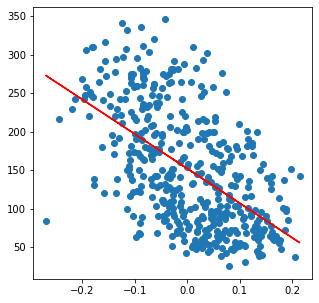

In [31]:
def line_PCA(theta,x):
    return theta[0] + theta[1]*x

theta = np.array([152.1335, -448.1951])



plt.plot(x, line_PCA(theta, x), 'r-')
plt.scatter(x,y);